## Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")


# Task


Generate artificial datasets that illustrate the assumptions and characteristics of different methods. Datasets are ideally bidimensional. Among other dataset properties you can experiment with:

• number of cases

• number of classes

• proportion of classes

• distribution of points within each class (shape of point clouds)

• shape of the border between the class regions, from linear to whatever

• level of noise

• level of overlap between the classes

Consider the methods: logistic regression, LDA, QDA, Decision Tree without pruning, Decision Tree with a maximum depth of 2, SVM linear, SVM RBF.

## Generating data

In [2]:
def generate_datasets(n_samples=100, n_features=2, n_classes=2, class_proportions=None, class_sep=1.0,
                      random_state=None):
    n_informative = min(n_features, n_classes - 1)
    n_redundant = max(0, n_features - n_informative - 1)
    X, y = make_classification(n_samples=n_samples, n_features=n_features, n_classes=n_classes,
                               n_clusters_per_class=1, class_sep=class_sep,
                               weights=class_proportions, random_state=random_state,
                               n_informative=n_informative, n_redundant=n_redundant)
    return X, y

In [3]:
#we can plot the dataset for a quick look
def plot_dataset(X, y, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feat1')
    plt.ylabel('Feat2')
    plt.show()

## Classification Methods

Logistic regression is a statistical method used for binary classification tasks, where the target variable (or label) is categorical and has two possible outcomes (e.g., 0 or 1, yes or no, true or false). It models the probability that a given input belongs to a particular class.

In [4]:
def logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

Linear Discriminant Analysis (LDA) is a dimensionality reduction technique used for classification tasks. It's particularly useful when dealing with multiple classes and assumes that the input variables are normally distributed.

In [5]:
def lda(X_train, y_train, X_test, y_test):
    model = LinearDiscriminantAnalysis()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

Similar to LDA, Quadratic Discriminant Analysis (QDA) is a classification algorithm that models the class conditional probability densities of the input features, but unlike LDA, it allows for different covariance matrices for each class.

In [6]:
def qda(X_train, y_train, X_test, y_test):
    model = QuadraticDiscriminantAnalysis()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

Decision trees recursively split the data into subsets based on the value of input features, aiming to minimize impurity or maximize information gain at each step.

In [7]:
def decision_tree(X_train, y_train, X_test, y_test, max_depth=None):
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

Support Vector Machine (SVM) - Linear Kernel aims to find the hyperplane that best separates classes in the feature space. In the case of a linear kernel, it finds a linear decision boundary.

In [8]:
def svm_linear(X_train, y_train, X_test, y_test):
    model = SVC(kernel='linear')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

Support Vector Machine (SVM) - RBF Kernel,similar to the linear SVM, but with the use of the radial basis function (RBF) kernel, SVM with RBF kernel can model non-linear decision boundaries.

In [9]:
def svm_rbf(X_train, y_train, X_test, y_test):
    model = SVC(kernel='rbf')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

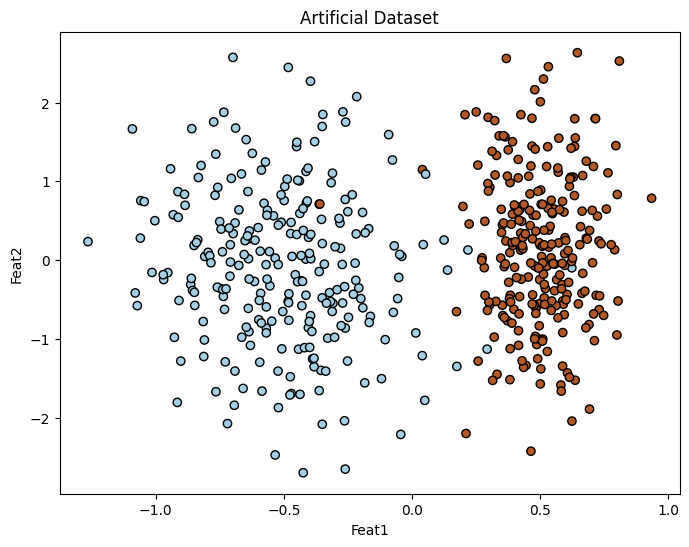

Logistic Regression: Accuracy = 0.99
LDA: Accuracy = 0.99
QDA: Accuracy = 0.99
Decision Tree: Accuracy = 0.98
Decision Tree (max_depth=2): Accuracy = 0.99
SVM (Linear): Accuracy = 0.99
SVM (RBF): Accuracy = 0.99


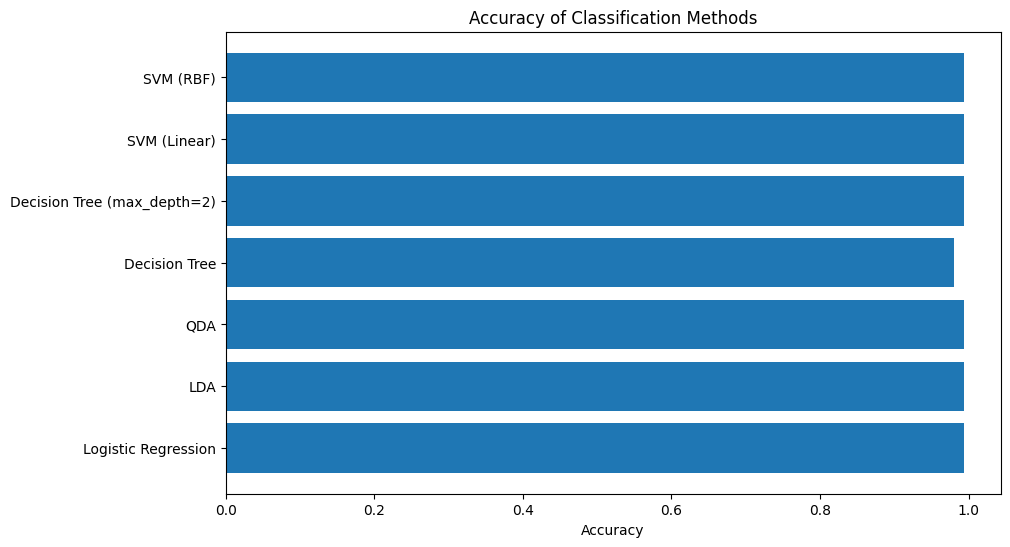

In [10]:
# Main function to generate datasets and evaluate methods
def main():
    np.random.seed(42)

    # Generate artificial datasets
    X, y = generate_datasets(n_samples=500, n_features=2, n_classes=2, class_proportions=[0.5, 0.5],
                             class_sep=0.50, random_state=42)

    # Split dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Plot dataset
    plot_dataset(X, y, "Artificial Dataset")

    # Evaluate classification methods
    methods = {
        "Logistic Regression": logistic_regression,
        "LDA": lda,
        "QDA": qda,
        "Decision Tree": lambda X_train, y_train, X_test, y_test: decision_tree(X_train, y_train, X_test, y_test),
        "Decision Tree (max_depth=2)": lambda X_train, y_train, X_test, y_test: decision_tree(X_train, y_train, X_test, y_test, max_depth=2),
        "SVM (Linear)": svm_linear,
        "SVM (RBF)": svm_rbf
    }

    results = {}
    for name, method in methods.items():
        acc = method(X_train, y_train, X_test, y_test)
        results[name] = acc
        print(f"{name}: Accuracy = {acc:.2f}")

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.barh(list(results.keys()), list(results.values()))
    plt.xlabel('Accuracy')
    plt.title('Accuracy of Classification Methods')
    plt.show()
    return X_train, y_train, methods
if __name__ == "__main__":
    X_train, y_train, methods = main()

## Investigate method assumptions
Find for each of the listed methods a dataset where the respective assumptions are met and assumptions of the other methods are not met (if possible). In other words a dataset where that method is hard to beat using cross validation. Explain why this dataset is appropriate for the method. Suggestion: use datasets with 2 predictors and 2 classes that can also be visualized. This is not mandatory.

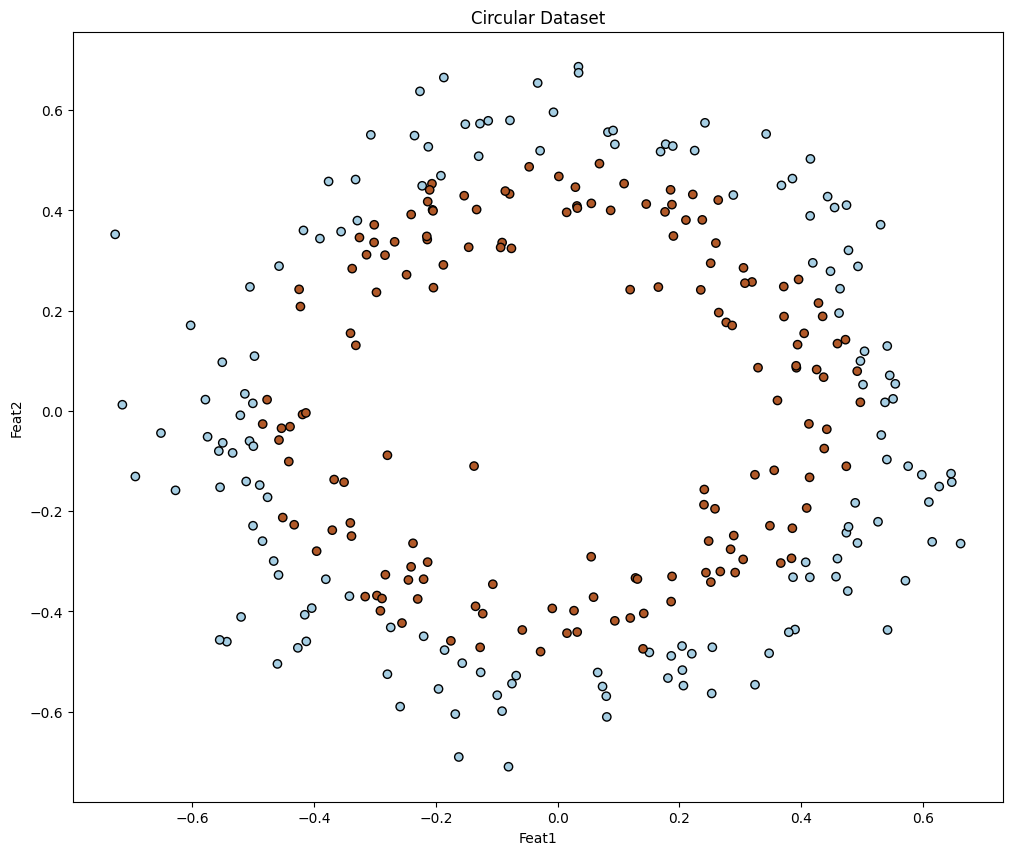

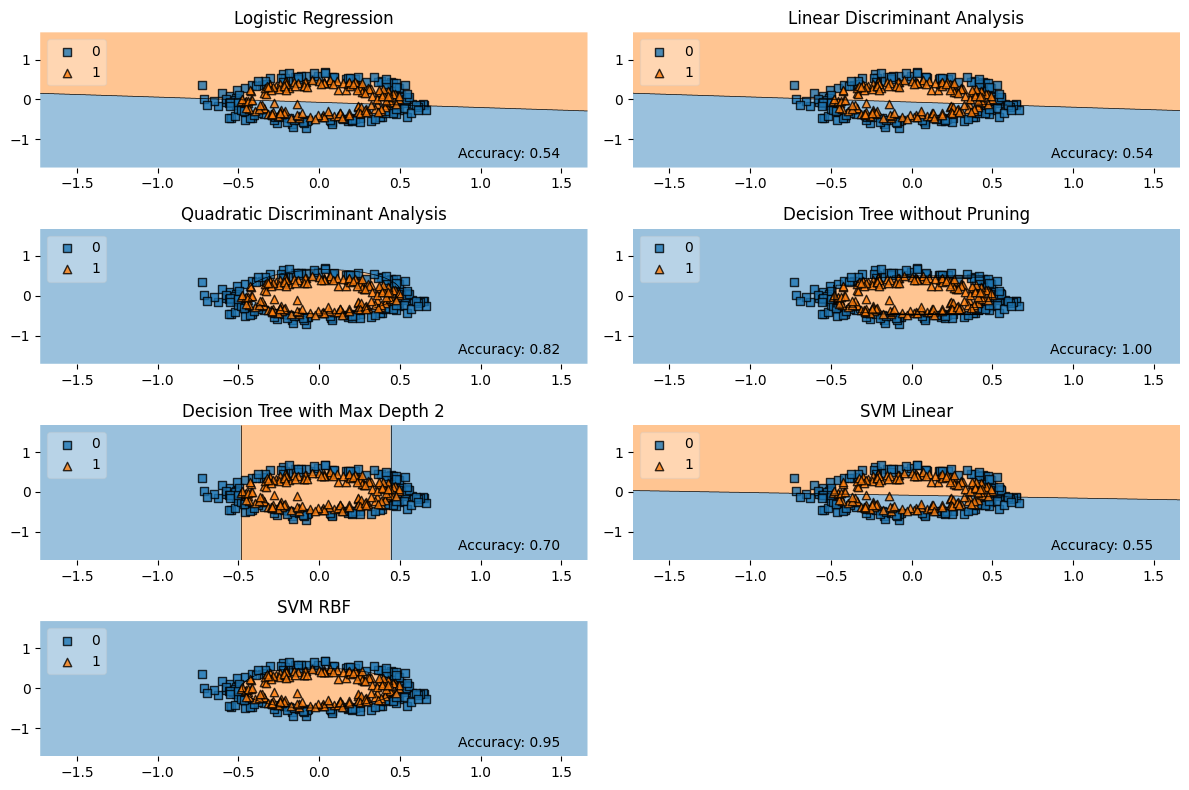

In [11]:
#DATASET GOOD FOR Decision Tree without pruning, SVM_rbf
def generate_circular_dataset(n_samples, radius, noise=0.1, random_state=None):
    if random_state:
        np.random.seed(random_state)

    # Generate random angles
    angles = np.random.uniform(0, 2*np.pi, n_samples)

    # Generate random radii around the specified radius
    radii = radius + np.random.normal(scale=noise, size=n_samples)

    # Convert polar coordinates to Cartesian coordinates
    X = np.column_stack([radii * np.cos(angles), radii * np.sin(angles)])

    # Assign labels based on whether points fall inside the circle
    y = np.zeros(n_samples)
    y[np.linalg.norm(X, axis=1) <= radius] = 1

    return X, y

# Generate circular dataset
X_circular, y_circular = generate_circular_dataset(n_samples=300, radius=.50, noise=0.1, random_state=42)

# Plot the circular dataset
plt.figure(figsize=(12, 10))  
plt.scatter(X_circular[:, 0], X_circular[:, 1], c=y_circular, cmap=plt.cm.Paired, edgecolors='k')
plt.title("Circular Dataset")
plt.xlabel('Feat1')
plt.ylabel('Feat2')
plt.show()

# Define classifiers
methods = {
    'Logistic Regression': LogisticRegression(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'Decision Tree without Pruning': DecisionTreeClassifier(),
    'Decision Tree with Max Depth 2': DecisionTreeClassifier(max_depth=2),
    'SVM Linear': SVC(kernel='linear', probability=True),
    'SVM RBF': SVC(kernel='rbf', probability=True)
}

# Determine the number of rows and columns for subplots
num_classifiers = len(methods)
num_cols = 2
num_rows = (num_classifiers + num_cols - 1) // num_cols

plt.figure(figsize=(12, 8))  
for i, (name, clf) in enumerate(methods.items(), start=1):
    plt.subplot(num_rows, num_cols, i)
    clf.fit(X_circular, y_circular)
    plot_decision_regions(X_circular, y_circular.astype(int), clf=clf, legend=2)
    plt.title(name)

    # Calculate and annotate accuracy
    acc = clf.score(X_circular, y_circular)
    plt.text(0.95, 0.05, f'Accuracy: {acc:.2f}', ha='right', va='bottom', transform=plt.gca().transAxes, fontsize=10)

plt.subplots_adjust(hspace=0.5, wspace=0.5)  
plt.tight_layout()
plt.show()


This dataset is deal well with Decision Tree without pruning, SVM_rbf.
The tree is due to overfitting, since it has no pruning it can grow until it reaches maximum accuracy, but it does not generalize, that means with some noise, the results would change, if using this model.
SVM_rbf is good to deal with non-linear decision boundaries, which make it work better than the other models.
Next we apply Cross Validation to see which models can generalize.

In [12]:


# Perform cross-validation
cv_scores = {}
for name, clf in methods.items():
    scores = cross_val_score(clf, X_circular, y_circular, cv=5)
    cv_scores[name] = scores.mean()

# Print cross-validation scores
print("Cross-Validation Mean Accuracy Scores:")
for name, score in cv_scores.items():
    print(f"{name}: {score:.2f}")


Cross-Validation Mean Accuracy Scores:
Logistic Regression: 0.54
Linear Discriminant Analysis: 0.54
Quadratic Discriminant Analysis: 0.79
Decision Tree without Pruning: 0.88
Decision Tree with Max Depth 2: 0.63
SVM Linear: 0.54
SVM RBF: 0.95


With the Cross-Validation we see that the SVM_RBF maintains the best score, also show that the models who can't deal with non linear falls behind to almost random choice. When looking to decision tree, since it is common to overfit, when we use Cross-Validation is possible to see how really is the metric.

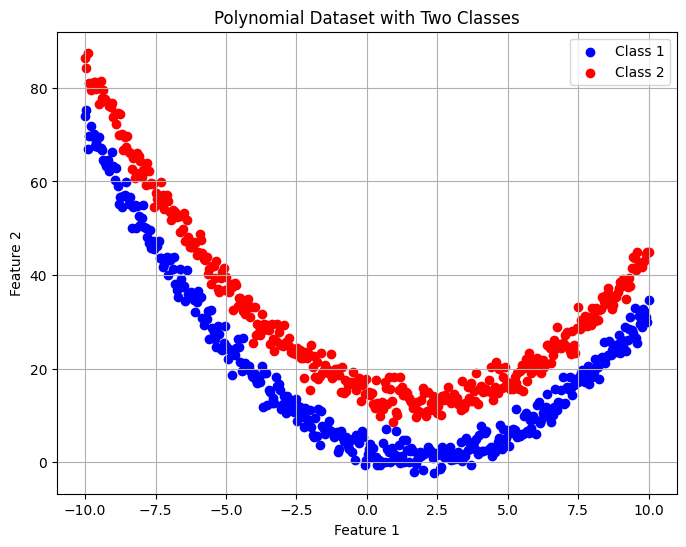

In [13]:

# Define the polynomial function
def polynomial_function(x):
    return 0.5 * x**2 - 2 * x + 3

# Generate random points for class 1 around the polynomial function
num_samples = 400
x_class1 = np.linspace(-10, 10, num_samples)
y_class1 = polynomial_function(x_class1) + np.random.normal(0, 2, num_samples)

# Generate random points for class 2 
x_class2 = np.linspace(-10, 10, num_samples)
y_class2 = polynomial_function(x_class2) + np.random.normal(0, 2, num_samples) + 12

# Combine class 1 and class 2 samples
X_poly = np.vstack((np.hstack((x_class1, x_class2)), np.hstack((y_class1, y_class2)))).T
y_poly = np.hstack((np.zeros(num_samples), np.ones(num_samples)))  # class labels

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(x_class1, y_class1, c='blue', label='Class 1')
plt.scatter(x_class2, y_class2, c='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Polynomial Dataset with Two Classes')
plt.legend()
plt.grid(True)
plt.show()


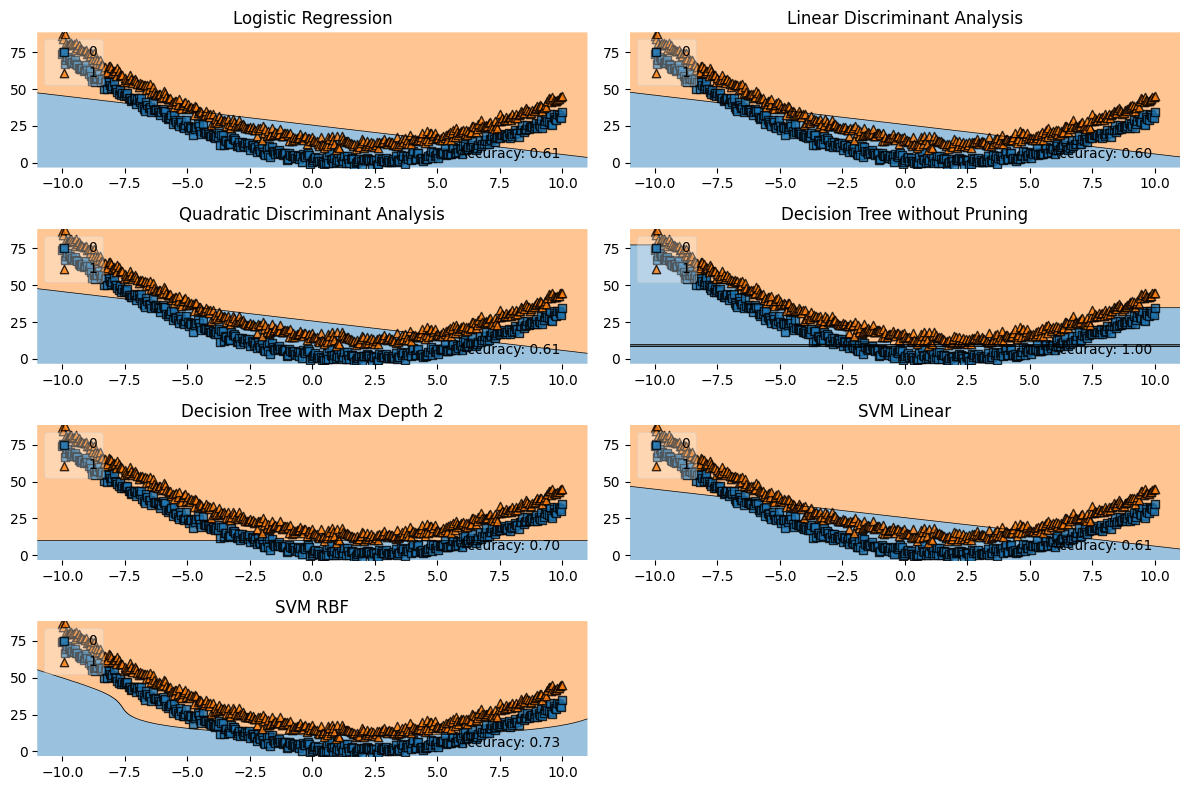

In [14]:
# Define classifiers
methods = {
    'Logistic Regression': LogisticRegression(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'Decision Tree without Pruning': DecisionTreeClassifier(),
    'Decision Tree with Max Depth 2': DecisionTreeClassifier(max_depth=2),
    'SVM Linear': SVC(kernel='linear', probability=True),
    'SVM RBF': SVC(kernel='rbf', probability=True)
}

# Apply classifiers and visualize decision regions
num_classifiers = len(methods)
num_cols = 2
num_rows = (num_classifiers + num_cols - 1) // num_cols

plt.figure(figsize=(12, 8))
for i, (name, clf) in enumerate(methods.items(), start=1):
    plt.subplot(num_rows, num_cols, i)
    clf.fit(X_poly, y_poly)
    plot_decision_regions(X_poly, y_poly.astype(int), clf=clf, legend=2)
    plt.title(name)

    # Calculate and annotate accuracy
    acc = clf.score(X_poly, y_poly)
    plt.text(0.95, 0.05, f'Accuracy: {acc:.2f}', ha='right', va='bottom', transform=plt.gca().transAxes, fontsize=10)

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.tight_layout()
plt.show()


In [15]:
# Apply cross-validation
for name, clf in methods.items():
    scores = cross_val_score(clf, X_poly, y_poly, cv=5)
    print(f'{name} - Mean Accuracy: {scores.mean():.2f}, Std Dev: {scores.std():.2f}')

Logistic Regression - Mean Accuracy: 0.53, Std Dev: 0.04
Linear Discriminant Analysis - Mean Accuracy: 0.53, Std Dev: 0.04
Quadratic Discriminant Analysis - Mean Accuracy: 0.54, Std Dev: 0.04
Decision Tree without Pruning - Mean Accuracy: 0.74, Std Dev: 0.20
Decision Tree with Max Depth 2 - Mean Accuracy: 0.68, Std Dev: 0.20
SVM Linear - Mean Accuracy: 0.55, Std Dev: 0.07
SVM RBF - Mean Accuracy: 0.51, Std Dev: 0.17


Using a polinomial second order function to generate the dataset, ended with Decision Tree having the best results, while the other models had similar accuracies to a random choice, that means with this default hyperparameters they cant classify correctly.

## Bias Variance

### 1-
Find a dataset where by varying the level of noise (or other dataset properties such as border shape)
different levels of tree pruning are ideal, from no pruning to maximum pruning. Produce a plot of level
of noise (or other some other property if you prefer) against ccp_alpha.

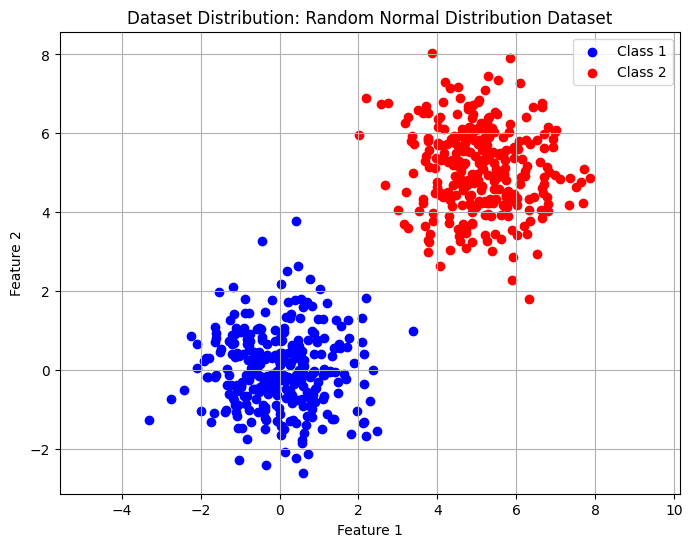

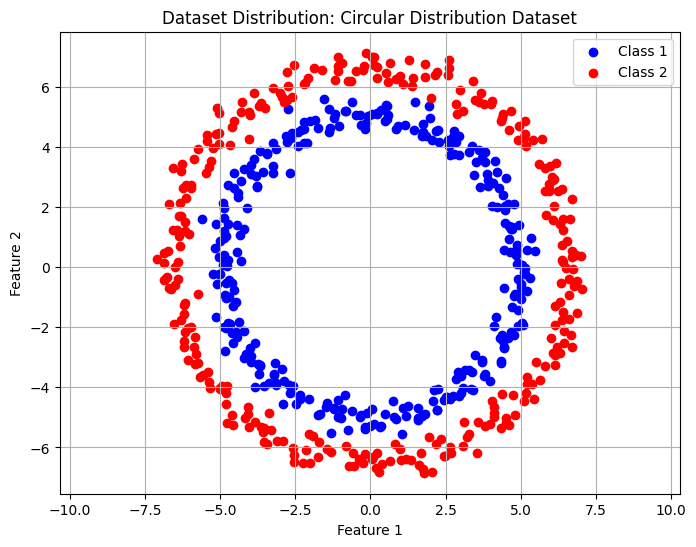

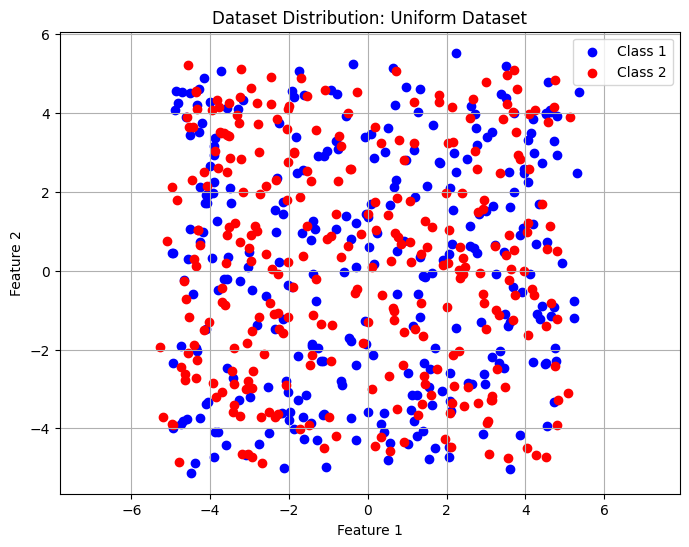

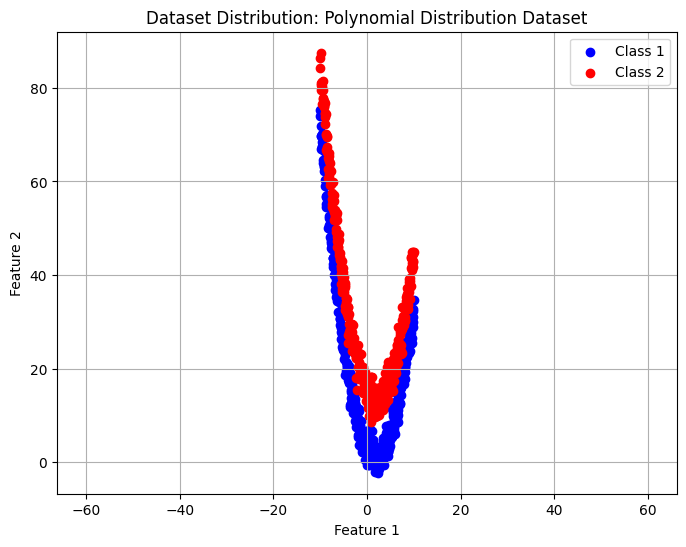

In [16]:


# Function to generate random normal distribution dataset
def generate_random_normal_dataset(num_samples, noise_level):
    np.random.seed(42)  # for reproducibility
    # Class 1: Random normal distribution with mean 0 and standard deviation 1
    class1_samples = np.random.normal(loc=0, scale=1, size=(num_samples, 2))
    # Class 2: Random normal distribution with mean 5 and standard deviation 1
    class2_samples = np.random.normal(loc=5, scale=1, size=(num_samples, 2))
    # Add noise to the dataset
    class1_samples += np.random.normal(loc=0, scale=noise_level, size=(num_samples, 2))
    class2_samples += np.random.normal(loc=0, scale=noise_level, size=(num_samples, 2))
    return class1_samples, class2_samples

# Function to generate circular distribution dataset with noise
def generate_circular_dataset_with_noise(num_samples, step_size, noise_level):
    np.random.seed(42)  # for reproducibility
    # Class 1: Points uniformly distributed around a circle with radius 5
    theta1 = np.linspace(0, 2*np.pi, num_samples)
    class1_samples = np.array([5*np.cos(theta1), 5*np.sin(theta1)]).T
    # Class 2: Points uniformly distributed around another circle with radius 5 + step_size
    theta2 = np.linspace(step_size, 2*np.pi + step_size, num_samples)
    class2_samples = np.array([(5+step_size)*np.cos(theta2), (5+step_size)*np.sin(theta2)]).T
    # Add noise to the dataset
    class1_samples += np.random.normal(loc=0, scale=noise_level, size=(num_samples, 2))
    class2_samples += np.random.normal(loc=0, scale=noise_level, size=(num_samples, 2))
    return class1_samples, class2_samples




def generate_uniform_dataset(num_samples, noise_level):
    np.random.seed(42)  # for reproducibility
    
    # Define the range of the rectangular region
    x_min, x_max = -5, 5
    y_min, y_max = -5, 5
    
    # Generate class 1 samples uniformly distributed in the region
    class1_samples = np.random.uniform(low=(x_min, y_min), high=(x_max, y_max), size=(num_samples, 2))
    
    # Generate class 2 samples uniformly distributed in a different region
    class2_samples = np.random.uniform(low=(-x_max, -y_max), high=(-x_min, -y_min), size=(num_samples, 2))
    
    # Add noise to the dataset
    class1_samples += np.random.normal(loc=0, scale=noise_level, size=(num_samples, 2))
    class2_samples += np.random.normal(loc=0, scale=noise_level, size=(num_samples, 2))
    
    return class1_samples, class2_samples



def generate_polynomial_dataset(num_samples, x_range, noise_level):
    np.random.seed(42)  # for reproducibility
    
    # Define the polynomial function
    def polynomial_function(x):
        return 0.5 * x**2 - 2 * x + 3
    
    # Generate random points for class 1 around the polynomial function
    x_class1 = np.linspace(x_range[0], x_range[1], num_samples)
    y_class1 = polynomial_function(x_class1) + np.random.normal(0, noise_level, num_samples)
    
    # Generate random points for class 2 with some overlap
    x_class2 = np.linspace(x_range[0], x_range[1], num_samples)
    y_class2 = polynomial_function(x_class2) + np.random.normal(0, noise_level, num_samples) + 12
    
    # Combine class 1 and class 2 samples
    X_poly = np.vstack((np.hstack((x_class1, x_class2)), np.hstack((y_class1, y_class2)))).T
    y_poly = np.hstack((np.zeros(num_samples), np.ones(num_samples)))  # class labels
    
    return X_poly, y_poly




# Plot dataset distribution
def plot_dataset(class1_samples, class2_samples, dataset_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(class1_samples[:, 0], class1_samples[:, 1], color='blue', label='Class 1')
    plt.scatter(class2_samples[:, 0], class2_samples[:, 1], color='red', label='Class 2')
    plt.title(f'Dataset Distribution: {dataset_name}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()


noise_level = 0.3  # adjustable noise level
num_samples = 300
class1_samples, class2_samples = generate_random_normal_dataset(num_samples, noise_level)
plot_dataset(class1_samples, class2_samples, 'Random Normal Distribution Dataset')


step_size = np.pi / 2  # adjustable step size

class1_samples, class2_samples = generate_circular_dataset_with_noise(num_samples, step_size,noise_level)
plot_dataset(class1_samples, class2_samples, 'Circular Distribution Dataset')


class1_samples, class2_samples = generate_uniform_dataset(num_samples, noise_level)
plot_dataset(class1_samples, class2_samples, 'Uniform Dataset')

# Plot polynomial distribution dataset
x_range = (-10, 10)
plot_dataset(X_poly[y_poly == 0], X_poly[y_poly == 1], 'Polynomial Distribution Dataset')


Accuracy for Random Normal Distribution Dataset (ccp_alpha 0.0): 0.9966666666666667
Accuracy for Circular Distribution Dataset (ccp_alpha 0.0): 1.0
Accuracy for Uniform Distribution Dataset (ccp_alpha 0.0): 0.5
Accuracy for Polynomial Distribution Dataset (ccp_alpha 0.0): 0.9633333333333334
Accuracy for Random Normal Distribution Dataset (ccp_alpha 0.01): 0.98
Accuracy for Circular Distribution Dataset (ccp_alpha 0.01): 1.0
Accuracy for Uniform Distribution Dataset (ccp_alpha 0.01): 0.5
Accuracy for Polynomial Distribution Dataset (ccp_alpha 0.01): 0.9333333333333333
Accuracy for Random Normal Distribution Dataset (ccp_alpha 0.02): 0.98
Accuracy for Circular Distribution Dataset (ccp_alpha 0.02): 0.9566666666666667
Accuracy for Uniform Distribution Dataset (ccp_alpha 0.02): 0.5
Accuracy for Polynomial Distribution Dataset (ccp_alpha 0.02): 0.8466666666666667
Accuracy for Random Normal Distribution Dataset (ccp_alpha 0.1): 0.98
Accuracy for Circular Distribution Dataset (ccp_alpha 0.1):

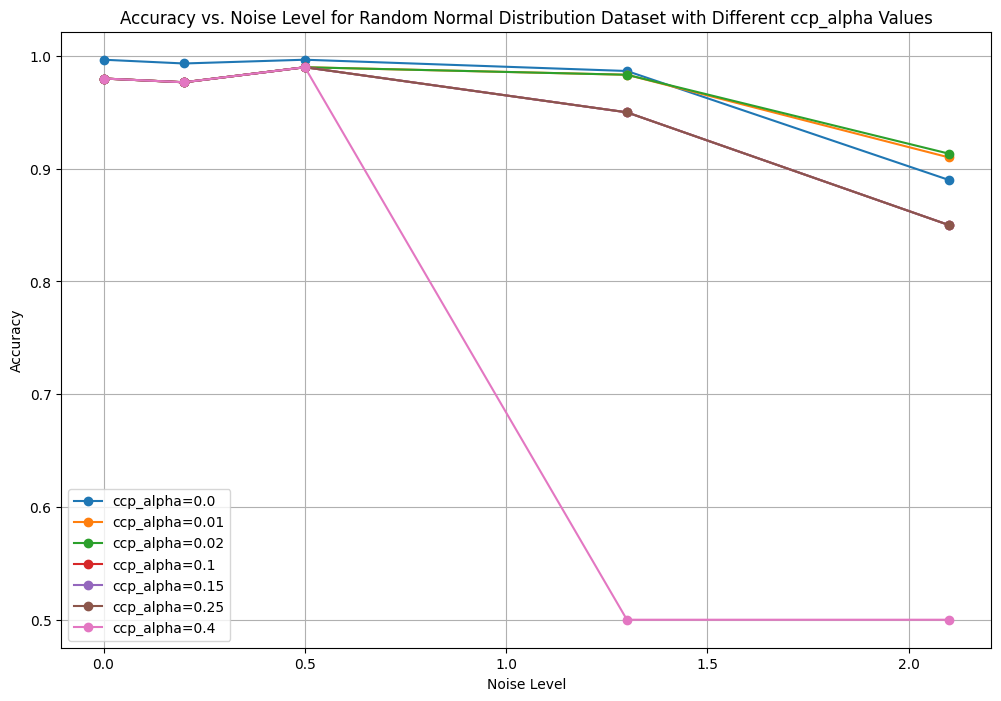

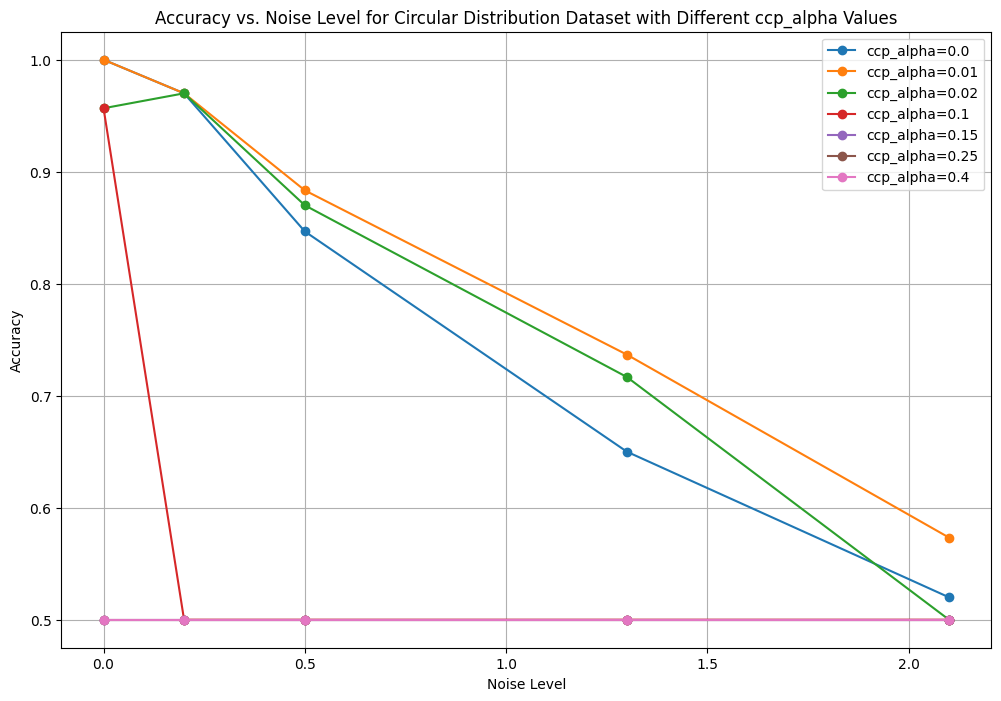

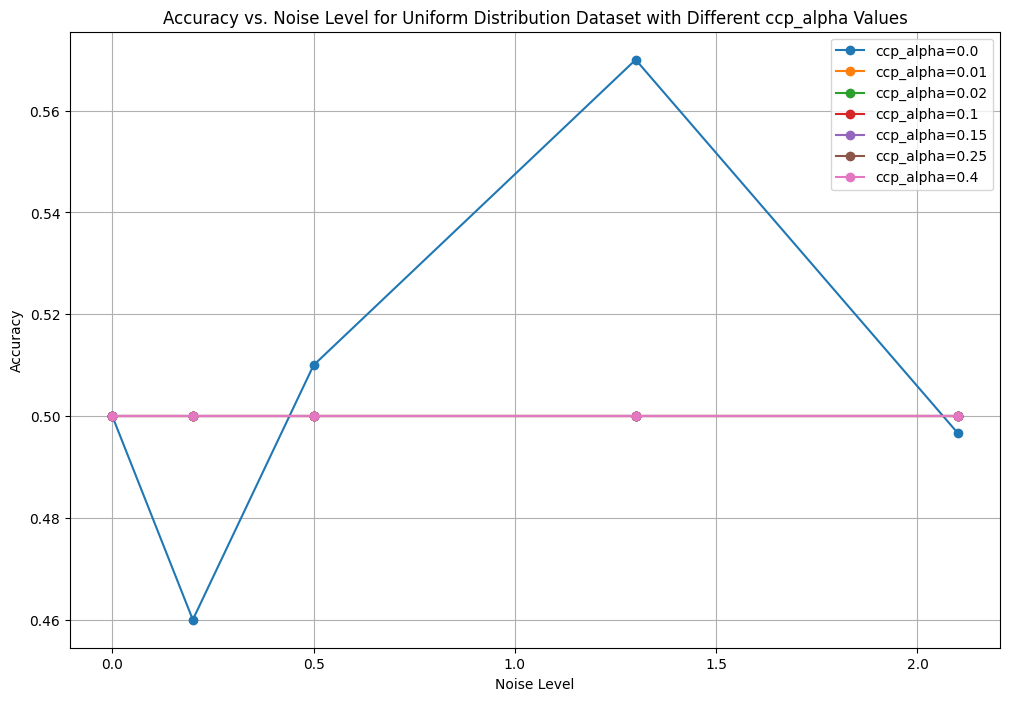

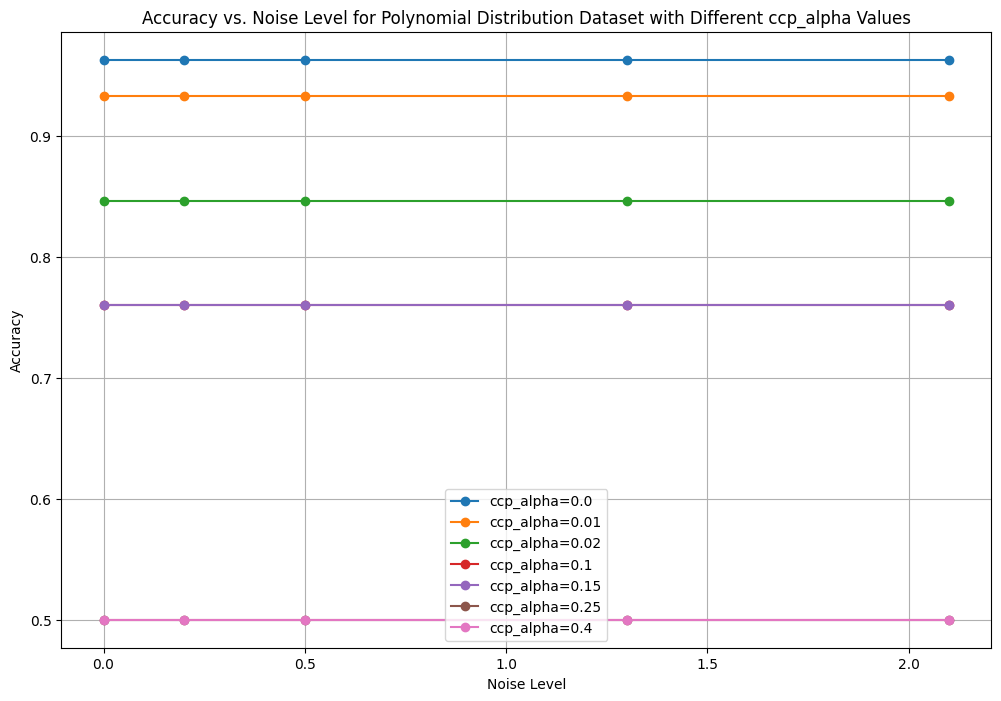

In [ ]:


# Define the evaluate_accuracy function to accept the polynomial dataset
def evaluate_accuracy(X_train, X_test, y_train, y_test, ccp_alpha, dataset_name):
    # Initialize and train the decision tree classifier with specified ccp_alpha
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    
    # Predict labels for the test set
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {dataset_name} (ccp_alpha {ccp_alpha}): {accuracy}")
    return accuracy

# Evaluate accuracy for each dataset with different noise levels and ccp_alpha values
noise_levels = [0.0, 0.2, 0.5, 1.3, 2.1]
ccp_alphas = [0.0, 0.01, 0.02, 0.1, 0.15, 0.25, 0.4]  # different values of ccp_alpha to test

accuracies_random_normal = {ccp_alpha: [] for ccp_alpha in ccp_alphas}
accuracies_circular = {ccp_alpha: [] for ccp_alpha in ccp_alphas}
accuracies_uniform = {ccp_alpha: [] for ccp_alpha in ccp_alphas}
accuracies_poly = {ccp_alpha: [] for ccp_alpha in ccp_alphas}  # Accuracy for polynomial dataset

for noise_level in noise_levels:
    for ccp_alpha in ccp_alphas:
        # Generate random normal distribution dataset
        class1_samples, class2_samples = generate_random_normal_dataset(num_samples, noise_level)
        X_random_normal = np.vstack((class1_samples, class2_samples))
        y_random_normal = np.hstack((np.zeros(num_samples), np.ones(num_samples)))  # class labels

        # Split dataset into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X_random_normal, y_random_normal, test_size=0.3, random_state=42)

        # Evaluate accuracy for random normal distribution dataset
        accuracy = evaluate_accuracy(X_train, X_test, y_train, y_test, ccp_alpha, "Random Normal Distribution Dataset")
        accuracies_random_normal[ccp_alpha].append(accuracy)

        # Generate circular distribution dataset with noise
        class1_samples, class2_samples = generate_circular_dataset_with_noise(num_samples, step_size, noise_level)
        X_circular = np.vstack((class1_samples, class2_samples))
        y_circular = np.hstack((np.zeros(num_samples), np.ones(num_samples)))  # class labels

        # Split dataset into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X_circular, y_circular, test_size=0.3, random_state=42)

        # Evaluate accuracy for circular distribution dataset
        accuracy = evaluate_accuracy(X_train, X_test, y_train, y_test, ccp_alpha, "Circular Distribution Dataset")
        accuracies_circular[ccp_alpha].append(accuracy)

        # Generate uniform distribution dataset with noise
        class1_samples, class2_samples = generate_uniform_dataset(num_samples, noise_level)
        X_uniform = np.vstack((class1_samples, class2_samples))
        y_uniform = np.hstack((np.zeros(num_samples), np.ones(num_samples)))  # class labels

        # Split dataset into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X_uniform, y_uniform, test_size=0.3, random_state=42)

        # Evaluate accuracy for uniform distribution dataset
        accuracy = evaluate_accuracy(X_train, X_test, y_train, y_test, ccp_alpha, "Uniform Distribution Dataset")
        accuracies_uniform[ccp_alpha].append(accuracy)

        # Split polynomial dataset into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X_poly, y_poly, test_size=0.3, random_state=42)

        # Evaluate accuracy for polynomial distribution dataset
        accuracy = evaluate_accuracy(X_train, X_test, y_train, y_test, ccp_alpha, "Polynomial Distribution Dataset")
        accuracies_poly[ccp_alpha].append(accuracy)

# Plot accuracy vs. noise level for all datasets with different ccp_alpha values
# Plot accuracy vs. noise level for random normal distribution dataset with different ccp_alpha values
plt.figure(figsize=(12, 8))
for ccp_alpha in ccp_alphas:
    plt.plot(noise_levels, accuracies_random_normal[ccp_alpha], marker='o', label=f'ccp_alpha={ccp_alpha}')

plt.title('Accuracy vs. Noise Level for Random Normal Distribution Dataset with Different ccp_alpha Values')
plt.xlabel('Noise Level')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot accuracy vs. noise level for circular distribution dataset with different ccp_alpha values
plt.figure(figsize=(12, 8))
for ccp_alpha in ccp_alphas:
    plt.plot(noise_levels, accuracies_circular[ccp_alpha], marker='o', label=f'ccp_alpha={ccp_alpha}')

plt.title('Accuracy vs. Noise Level for Circular Distribution Dataset with Different ccp_alpha Values')
plt.xlabel('Noise Level')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot accuracy vs. noise level for uniform distribution dataset with different ccp_alpha values
plt.figure(figsize=(12, 8))
for ccp_alpha in ccp_alphas:
    plt.plot(noise_levels, accuracies_uniform[ccp_alpha], marker='o', label=f'ccp_alpha={ccp_alpha}')

plt.title('Accuracy vs. Noise Level for Uniform Distribution Dataset with Different ccp_alpha Values')
plt.xlabel('Noise Level')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot accuracy vs. noise level for polynomial distribution dataset with different ccp_alpha values
plt.figure(figsize=(12, 8))
for ccp_alpha in ccp_alphas:
    plt.plot(noise_levels, accuracies_poly[ccp_alpha], marker='o', label=f'ccp_alpha={ccp_alpha}')

plt.title('Accuracy vs. Noise Level for Polynomial Distribution Dataset with Different ccp_alpha Values')
plt.xlabel('Noise Level')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

### Answer:
The Circular Dataset and the random dataset have different ccp_alpha values with better accuracy depending on the noise lvl, this is more visible in the circular one, while the polynomial the noise lvl does not affect the ccp_aplha. 

## 2.Bias vs Variance error
Measure bias and variance error decomposition for three versions of this dataset along ccp_alpha
(decision trees).

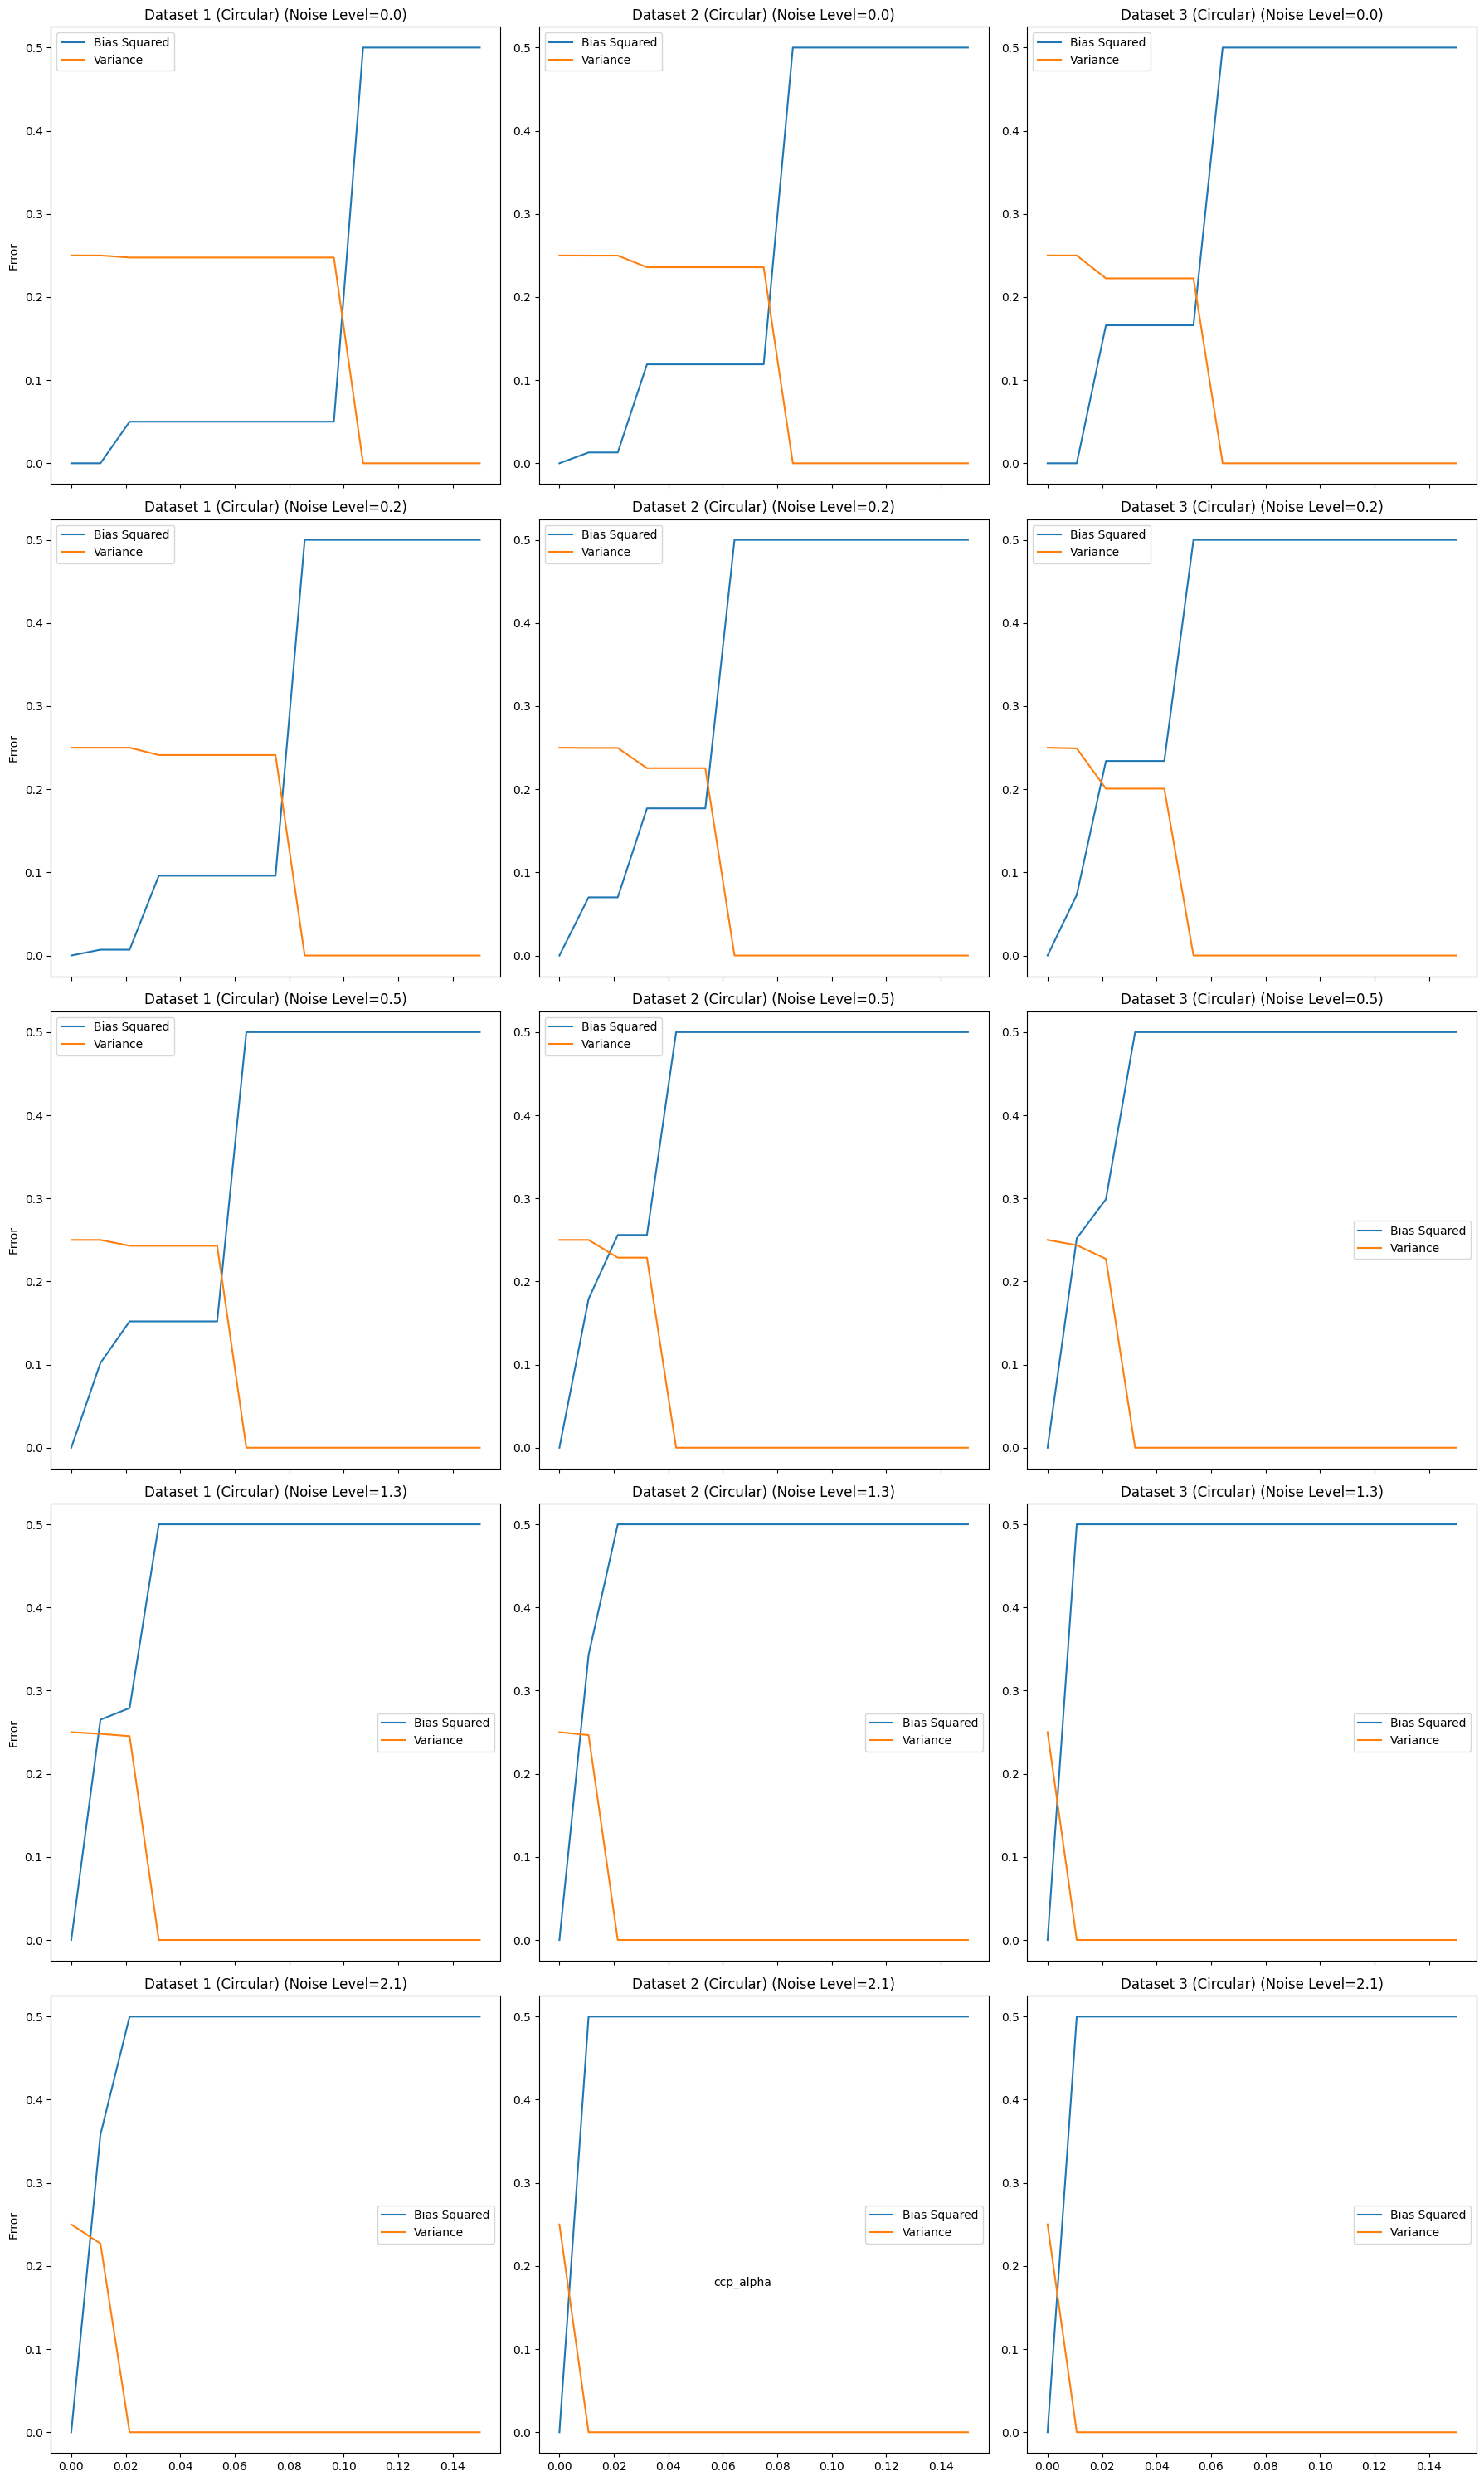

In [18]:
#Circular dataset

# Define parameters for the circular dataset
num_samples = 500
step_size = np.pi / 2
noise_levels = [0.0, 0.2, 0.5, 1.3, 2.1]
ccp_alphas = np.linspace(0, 0.15, 15)

# Initialize lists to store bias and variance for each noise level and each dataset
bias_squared_all_circular1 = []
variance_all_circular1 = []

bias_squared_all_circular2 = []
variance_all_circular2 = []

bias_squared_all_circular3 = []
variance_all_circular3 = []

# Iterate over different noise levels
for noise_level in noise_levels:
    # Generate circular dataset 1
    class1_samples, class2_samples = generate_circular_dataset_with_noise(num_samples, np.pi/2, noise_level)
    X_circular1 = np.vstack((class1_samples, class2_samples))
    y_circular1 = np.hstack((np.zeros(num_samples), np.ones(num_samples)))  # class labels
    
    # Generate circular dataset 2
    class1_samples, class2_samples = generate_circular_dataset_with_noise(num_samples, np.pi/3, noise_level)
    X_circular2 = np.vstack((class1_samples, class2_samples))
    y_circular2 = np.hstack((np.zeros(num_samples), np.ones(num_samples)))  # class labels
    
    # Generate circular dataset 3
    class1_samples, class2_samples = generate_circular_dataset_with_noise(num_samples, np.pi/4, noise_level)
    X_circular3 = np.vstack((class1_samples, class2_samples))
    y_circular3 = np.hstack((np.zeros(num_samples), np.ones(num_samples)))  # class labels
    
    for X_circular, y_circular, bias_squared_all_circular, variance_all_circular in [
        (X_circular1, y_circular1, bias_squared_all_circular1, variance_all_circular1),
        (X_circular2, y_circular2, bias_squared_all_circular2, variance_all_circular2),
        (X_circular3, y_circular3, bias_squared_all_circular3, variance_all_circular3)
    ]:
        # Initialize lists to store predictions
        predictions_all = []

        # Iterate over different ccp_alpha values
        for ccp_alpha in ccp_alphas:
            # Initialize lists to store predictions
            predictions = []

            # Fit decision tree classifier
            clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)
            clf.fit(X_circular, y_circular)

            # Make predictions on each sample
            for _ in range(100):
                y_pred = clf.predict(X_circular)
                predictions.append(y_pred)
            predictions_all.append(predictions)

        # Reshape y_circular to match the shape of avg_predictions
        y_circular_reshaped = np.tile(y_circular.reshape(1, -1), (15, 1))

        # Calculate bias squared and variance
        avg_predictions = np.mean(predictions_all, axis=1)
        bias_squared = np.mean((avg_predictions - y_circular_reshaped) ** 2, axis=1)
        variance = np.mean(np.var(predictions_all, axis=2), axis=1)

        # Store bias and variance for current noise level
        bias_squared_all_circular.append(bias_squared)
        variance_all_circular.append(variance)

# Create subplots for each noise level
fig, axs = plt.subplots(len(noise_levels), 3, figsize=(18, 6 * len(noise_levels)), sharex=True)

# Iterate over different noise levels
for i, noise_level in enumerate(noise_levels):
    # Plot bias and variance for each dataset
    axs[i, 0].plot(ccp_alphas, bias_squared_all_circular1[i], label='Bias Squared')
    axs[i, 0].plot(ccp_alphas, variance_all_circular1[i], label='Variance')
    axs[i, 0].set_title(f'Dataset 1 (Circular) (Noise Level={noise_level})')
    axs[i, 0].set_ylabel('Error')
    axs[i, 0].legend()

    axs[i, 1].plot(ccp_alphas, bias_squared_all_circular2[i], label='Bias Squared')
    axs[i, 1].plot(ccp_alphas, variance_all_circular2[i], label='Variance')
    axs[i, 1].set_title(f'Dataset 2 (Circular) (Noise Level={noise_level})')
    axs[i, 1].legend()

    axs[i, 2].plot(ccp_alphas, bias_squared_all_circular3[i], label='Bias Squared')
    axs[i, 2].plot(ccp_alphas, variance_all_circular3[i], label='Variance')
    axs[i, 2].set_title(f'Dataset 3 (Circular) (Noise Level={noise_level})')
    axs[i, 2].legend()

# Set common x-axis label
fig.text(0.5, 0.08, 'ccp_alpha', ha='center')
plt.tight_layout()
plt.show()


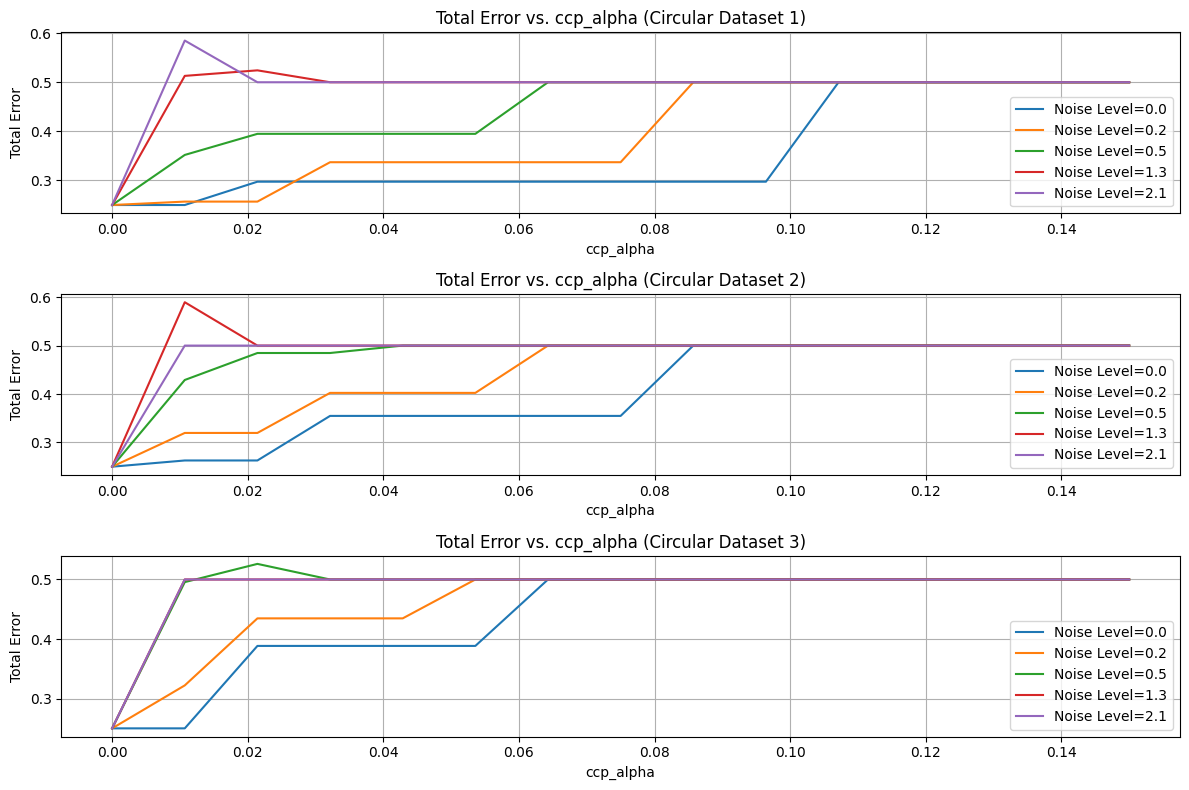

In [19]:
# Calculate total error for each circular dataset
total_error_circular1 = np.array(bias_squared_all_circular1) + np.array(variance_all_circular1)
total_error_circular2 = np.array(bias_squared_all_circular2) + np.array(variance_all_circular2)
total_error_circular3 = np.array(bias_squared_all_circular3) + np.array(variance_all_circular3)

# Plot total error vs. ccp_alpha for each circular dataset
plt.figure(figsize=(12, 8))

# Plot for dataset 1
plt.subplot(3, 1, 1)
for i, noise_level in enumerate(noise_levels):
    plt.plot(ccp_alphas, total_error_circular1[i], label=f'Noise Level={noise_level}')
plt.title('Total Error vs. ccp_alpha (Circular Dataset 1)')
plt.xlabel('ccp_alpha')
plt.ylabel('Total Error')
plt.legend()
plt.grid(True)

# Plot for dataset 2
plt.subplot(3, 1, 2)
for i, noise_level in enumerate(noise_levels):
    plt.plot(ccp_alphas, total_error_circular2[i], label=f'Noise Level={noise_level}')
plt.title('Total Error vs. ccp_alpha (Circular Dataset 2)')
plt.xlabel('ccp_alpha')
plt.ylabel('Total Error')
plt.legend()
plt.grid(True)

# Plot for dataset 3
plt.subplot(3, 1, 3)
for i, noise_level in enumerate(noise_levels):
    plt.plot(ccp_alphas, total_error_circular3[i], label=f'Noise Level={noise_level}')
plt.title('Total Error vs. ccp_alpha (Circular Dataset 3)')
plt.xlabel('ccp_alpha')
plt.ylabel('Total Error')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


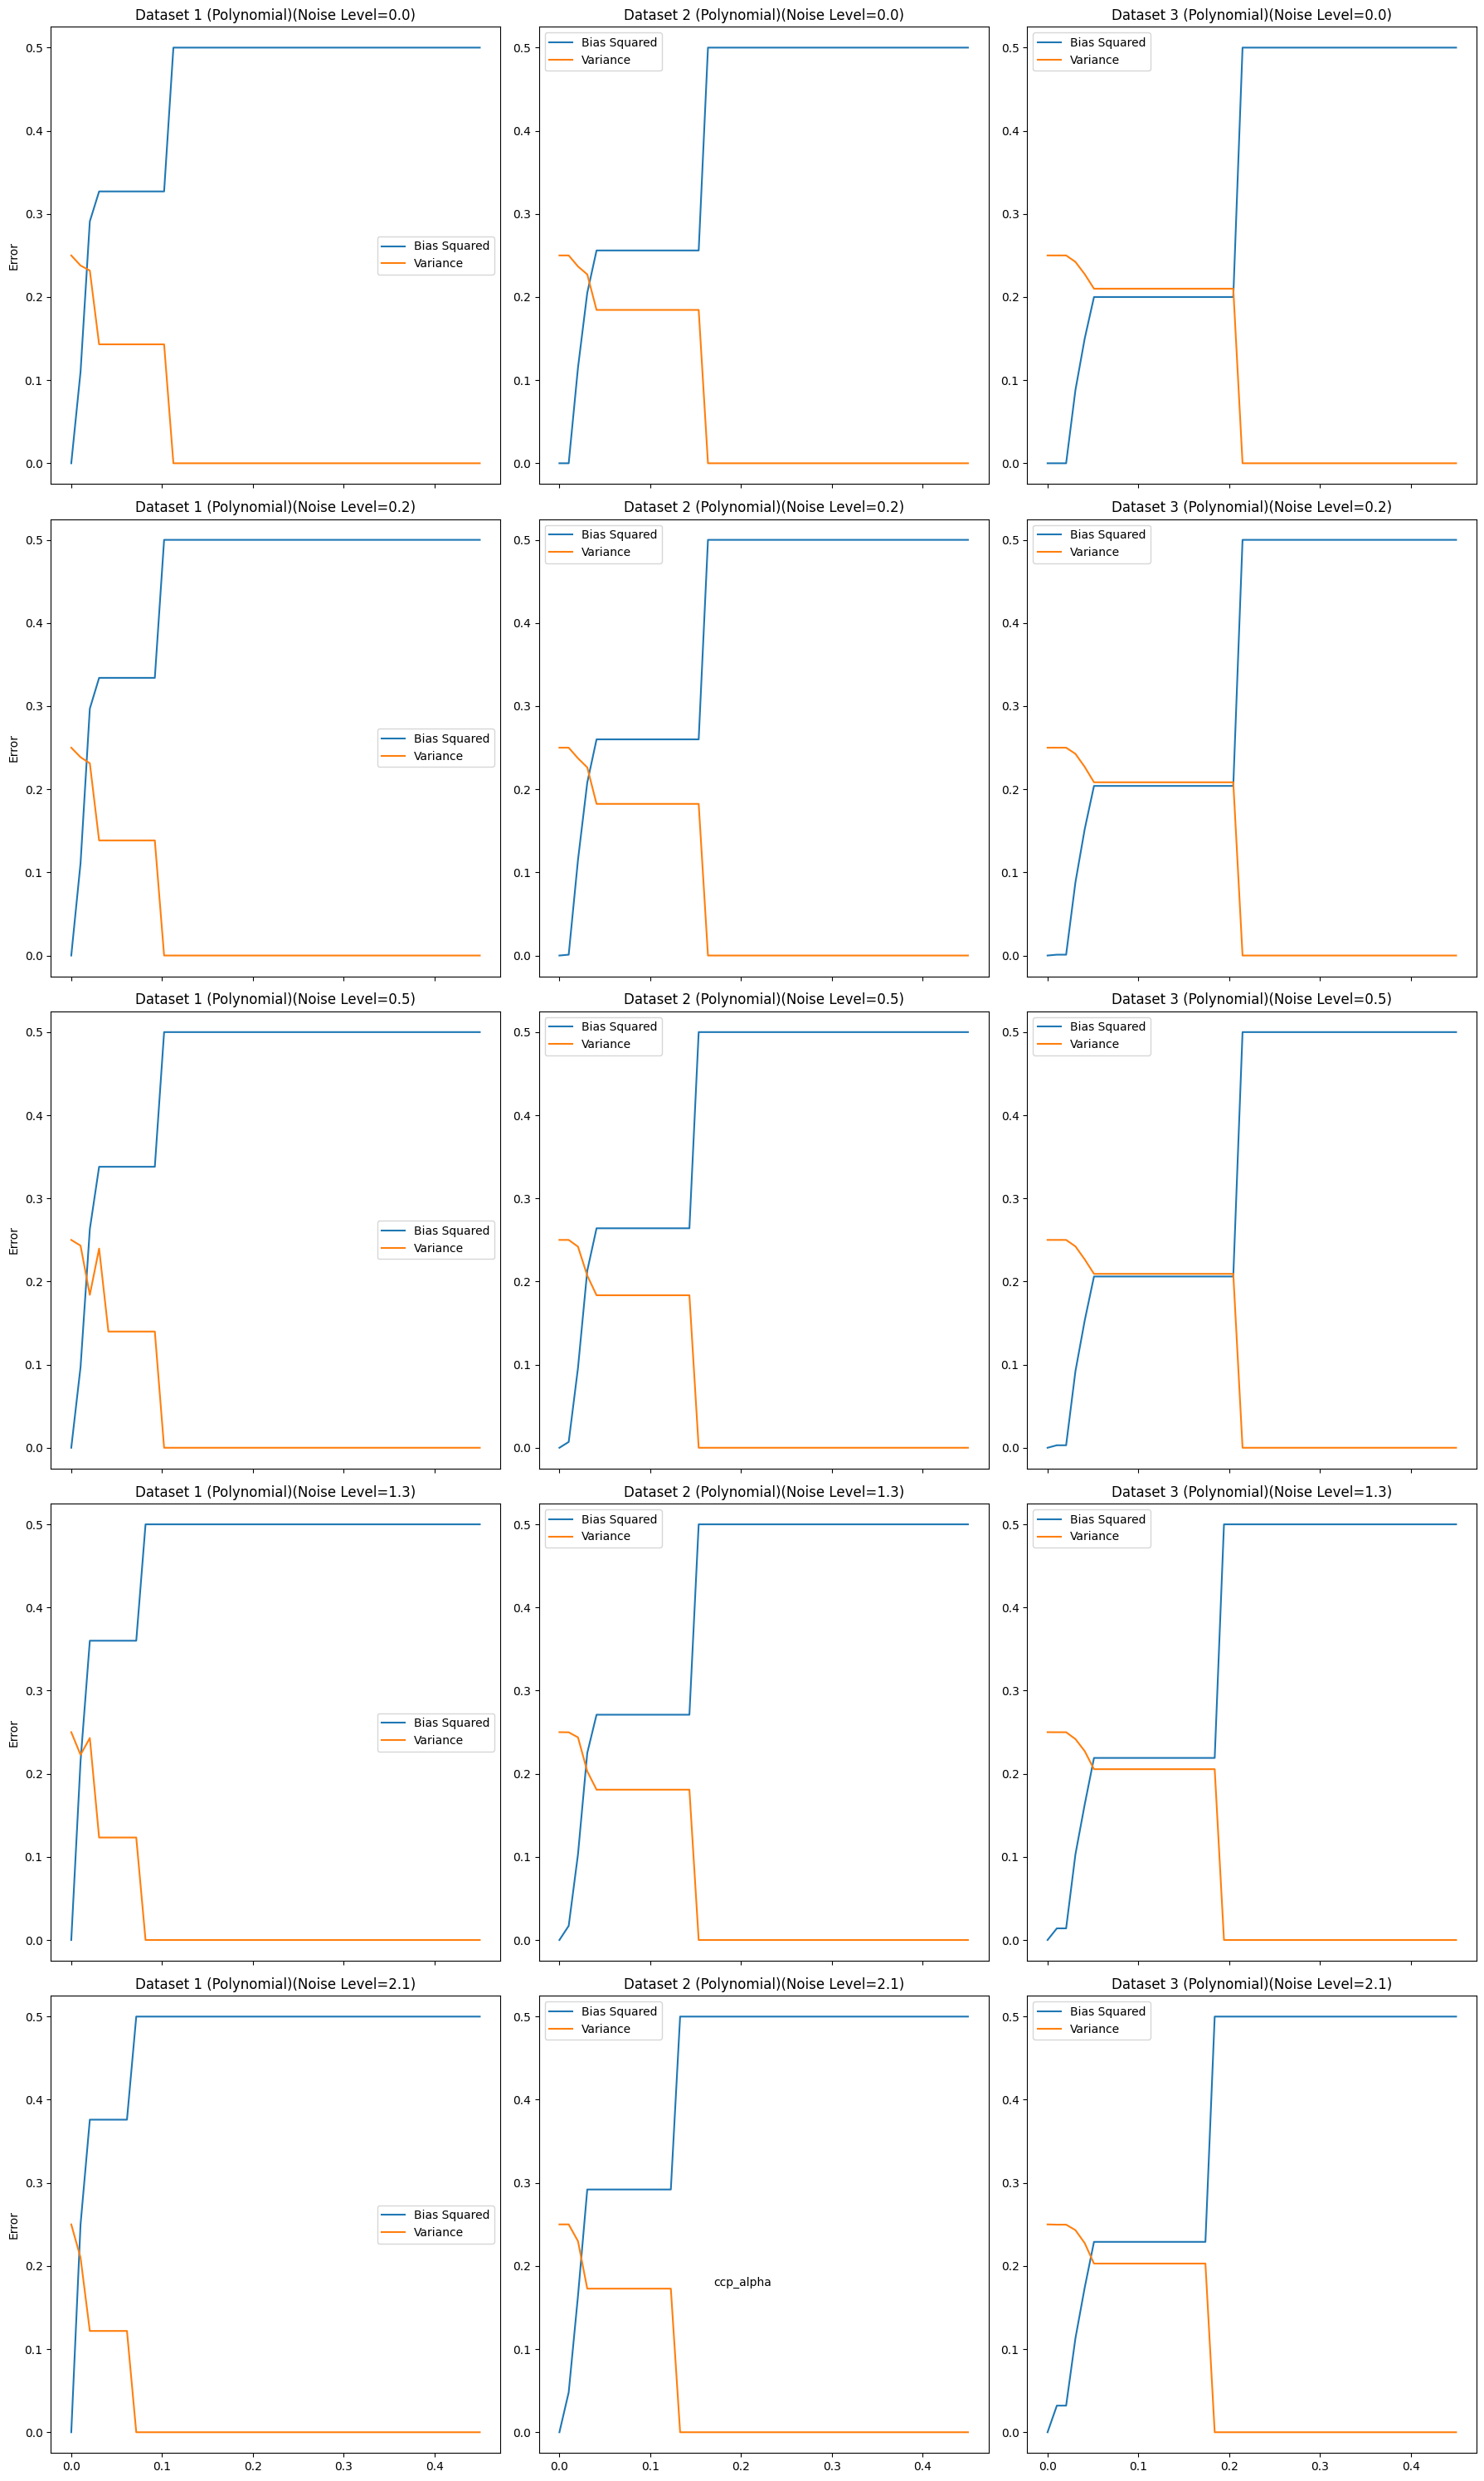

In [20]:
num_samples = 500
noise_levels = [0.0, 0.2, 0.5, 1.3, 2.1]
ccp_alphas = np.linspace(0, 0.45, 45)

# Initialize lists to store bias and variance for each noise level and each dataset
bias_squared_all_poly1 = []
variance_all_poly1 = []

bias_squared_all_poly2 = []
variance_all_poly2 = []

bias_squared_all_poly3 = []
variance_all_poly3 = []

# Iterate over different noise levels
for noise_level in noise_levels:
    # Generate polynomial dataset 1
    x_class1 = np.linspace(-10, 10, num_samples)
    y_class1 = polynomial_function(x_class1) + np.random.normal(0, noise_level, num_samples)
    x_class2 = np.linspace(-10, 10, num_samples)
    y_class2 = polynomial_function(x_class2) + np.random.normal(0, noise_level, num_samples) + 6
    X_poly1 = np.vstack((np.hstack((x_class1, x_class2)), np.hstack((y_class1, y_class2)))).T
    y_poly1 = np.hstack((np.zeros(num_samples), np.ones(num_samples)))  # class labels
    
    # Generate polynomial dataset 2
    y_class1 = polynomial_function(x_class1) + np.random.normal(0, noise_level, num_samples)
    y_class2 = polynomial_function(x_class2) + np.random.normal(0, noise_level, num_samples) + 12
    X_poly2 = np.vstack((np.hstack((x_class1, x_class2)), np.hstack((y_class1, y_class2)))).T
    y_poly2 = np.hstack((np.zeros(num_samples), np.ones(num_samples)))  # class labels
    
    # Generate polynomial dataset 3
    y_class1 = polynomial_function(x_class1) + np.random.normal(0, noise_level, num_samples)
    y_class2 = polynomial_function(x_class2) + np.random.normal(0, noise_level, num_samples) + 18
    X_poly3 = np.vstack((np.hstack((x_class1, x_class2)), np.hstack((y_class1, y_class2)))).T
    y_poly3 = np.hstack((np.zeros(num_samples), np.ones(num_samples)))  # class labels
    
    for X_poly, y_poly, bias_squared_all_poly, variance_all_poly in [
        (X_poly1, y_poly1, bias_squared_all_poly1, variance_all_poly1),
        (X_poly2, y_poly2, bias_squared_all_poly2, variance_all_poly2),
        (X_poly3, y_poly3, bias_squared_all_poly3, variance_all_poly3)
    ]:
        # Initialize lists to store predictions
        predictions_all = []

        # Iterate over different ccp_alpha values
        for ccp_alpha in ccp_alphas:
            # Initialize lists to store predictions
            predictions = []

            # Fit decision tree classifier
            clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)
            clf.fit(X_poly, y_poly)

            # Make predictions on each sample
            for _ in range(100):
                y_pred = clf.predict(X_poly)
                predictions.append(y_pred)
            predictions_all.append(predictions)

        # Reshape y_poly to match the shape of avg_predictions
        y_poly_reshaped = np.tile(y_poly.reshape(1, -1), (45, 1))

        # Calculate bias squared and variance
        avg_predictions = np.mean(predictions_all, axis=1)
        bias_squared = np.mean((avg_predictions - y_poly_reshaped) ** 2, axis=1)
        variance = np.mean(np.var(predictions_all, axis=2), axis=1)

        # Store bias and variance for current noise level
        bias_squared_all_poly.append(bias_squared)
        variance_all_poly.append(variance)

# Create subplots for each noise level
fig, axs = plt.subplots(len(noise_levels), 3, figsize=(18, 6 * len(noise_levels)), sharex=True)

# Iterate over different noise levels
for i, noise_level in enumerate(noise_levels):
    # Plot bias and variance for each dataset
    axs[i, 0].plot(ccp_alphas, bias_squared_all_poly1[i], label='Bias Squared')
    axs[i, 0].plot(ccp_alphas, variance_all_poly1[i], label='Variance')
    axs[i, 0].set_title(f'Dataset 1 (Polynomial)(Noise Level={noise_level})')
    axs[i, 0].set_ylabel('Error')
    axs[i, 0].legend()

    axs[i, 1].plot(ccp_alphas, bias_squared_all_poly2[i], label='Bias Squared')
    axs[i, 1].plot(ccp_alphas, variance_all_poly2[i], label='Variance')
    axs[i, 1].set_title(f'Dataset 2 (Polynomial)(Noise Level={noise_level})')
    axs[i, 1].legend()

    axs[i, 2].plot(ccp_alphas, bias_squared_all_poly3[i], label='Bias Squared')
    axs[i, 2].plot(ccp_alphas, variance_all_poly3[i], label='Variance')
    axs[i, 2].set_title(f'Dataset 3 (Polynomial)(Noise Level={noise_level})')
    axs[i, 2].legend()

# Set common x-axis label
fig.text(0.5, 0.08, 'ccp_alpha', ha='center')
plt.tight_layout()
plt.show()


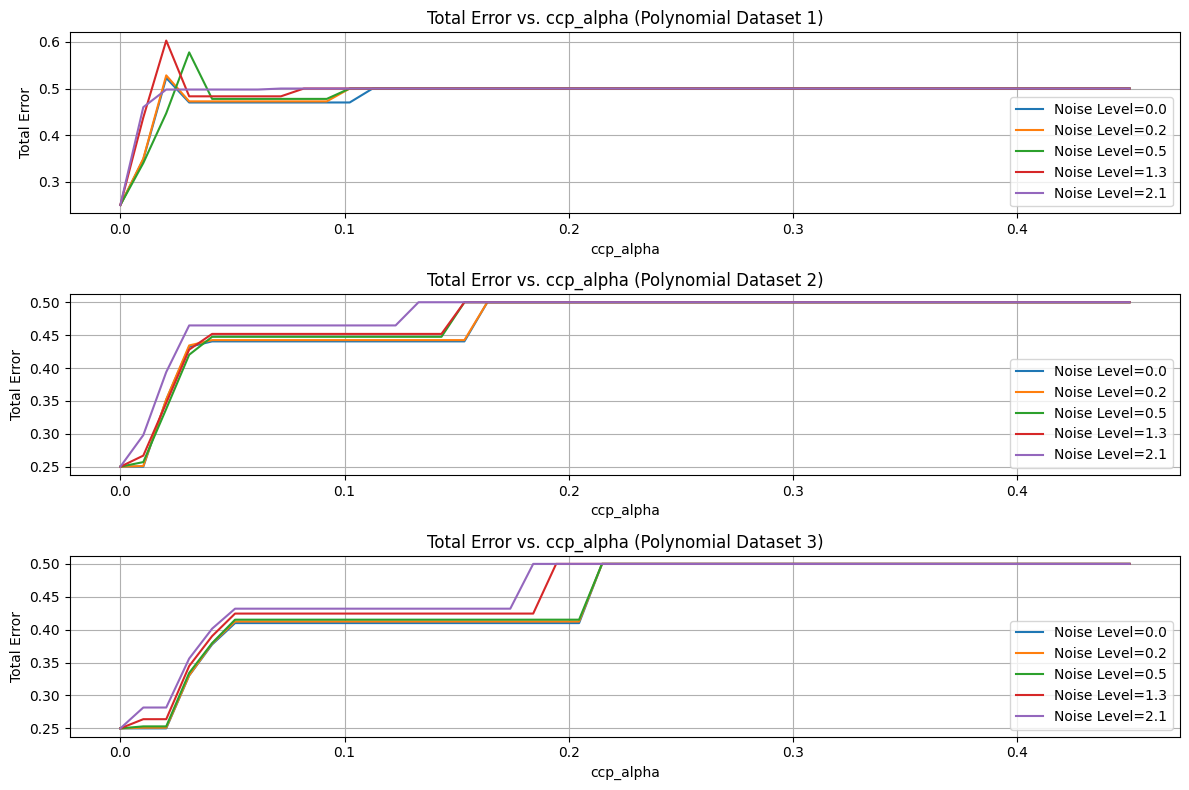

In [21]:
# Calculate total error for each polynomial dataset
total_error_poly1 = np.array(bias_squared_all_poly1) + np.array(variance_all_poly1)
total_error_poly2 = np.array(bias_squared_all_poly2) + np.array(variance_all_poly2)
total_error_poly3 = np.array(bias_squared_all_poly3) + np.array(variance_all_poly3)

# Plot total error vs. ccp_alpha for each polynomial dataset
plt.figure(figsize=(12, 8))

# Plot for dataset 1
plt.subplot(3, 1, 1)
for i, noise_level in enumerate(noise_levels):
    plt.plot(ccp_alphas, total_error_poly1[i], label=f'Noise Level={noise_level}')
plt.title('Total Error vs. ccp_alpha (Polynomial Dataset 1)')
plt.xlabel('ccp_alpha')
plt.ylabel('Total Error')
plt.legend()
plt.grid(True)

# Plot for dataset 2
plt.subplot(3, 1, 2)
for i, noise_level in enumerate(noise_levels):
    plt.plot(ccp_alphas, total_error_poly2[i], label=f'Noise Level={noise_level}')
plt.title('Total Error vs. ccp_alpha (Polynomial Dataset 2)')
plt.xlabel('ccp_alpha')
plt.ylabel('Total Error')
plt.legend()
plt.grid(True)

# Plot for dataset 3
plt.subplot(3, 1, 3)
for i, noise_level in enumerate(noise_levels):
    plt.plot(ccp_alphas, total_error_poly3[i], label=f'Noise Level={noise_level}')
plt.title('Total Error vs. ccp_alpha (Polynomial Dataset 3)')
plt.xlabel('ccp_alpha')
plt.ylabel('Total Error')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Answer Bias Variance
Regarding the Accuracy, noise lvl and ccp_alpha.
We studed 4 datasets.
 - Dataset with Random Normal distribution: The ccp_alpha needs higher values to affect the accuracy, the relation is higher ccp_alpha lower accuracy, while the noise_level appear to be affect with lower intervals, still it has the relation of decreasing accuracy.
 - Dataset circular distribution: Some ccp_alpha are better in given noise lvl, still with increase of the ccp_alpha and noise,  the accuracy drops, in this case it drops faster with the noise_level.
 - Dataset Uniform distribution: in this case the dataset could not have a accetable accuracy, and it was not studied.
 - Dataset Polynomial distribution:the Acccuracy x noise level by ccp_alpha we notice that for the polynomial function the noise have no impact on the accuracy, probably due to the low noise value compared to the separation of the classes. Regarding the ccp_alpha is clear that the more it increases the lower are the accuracies. IN this case ccp_alpha affects the accuracy faster than the noise_level.

After observing the 4 datasets, we decided to move with only the circular that is the one which for differents noise lvl have different accuracy and with the polynomial dataset which had the most different results and could be interessant. 

Next we did a plot for 3 versions of the circular and polynomial dataset, focusing on the Bias, Variance tradeoff.

Circular dataset:
Lower noise level need higher ccp_alpha until the trade-off.

Polynomial dataset:
Noise level don't affect the ccp_alpha value for the trade-off



Finally regarding the total error: 
Circular: The total error grow with the ccp_alpha, and also the noise level

Polynomial:we observe that lower ccp_alpha are the best and depending on the data separation the importance of the ccp_aplha drops.

# Ensembles

With the dataset you used to study trees, compare Bagging, RandomForest and AbaBoost and other forms
of boosting.

1-Compare the learning curves of the three methods along the number of trees and using OOB.

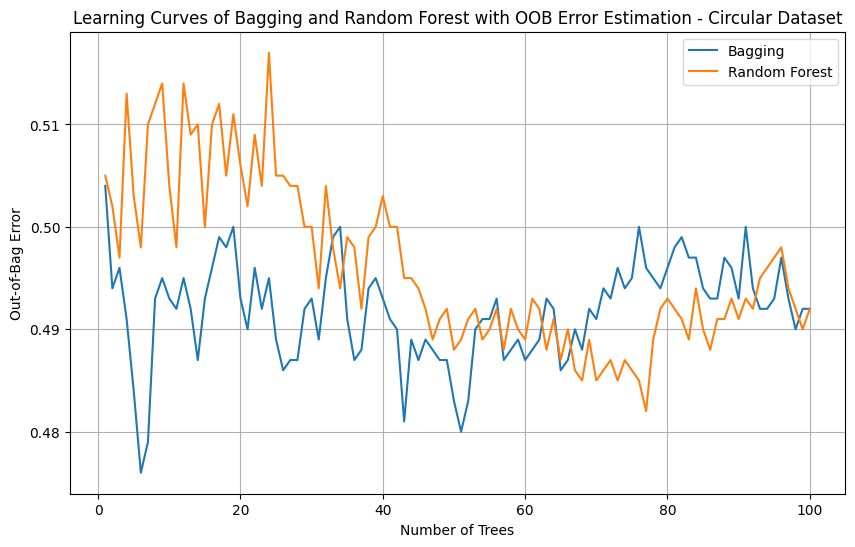

In [22]:

# Define the range of number of trees
num_trees = range(1, 101)

# Initialize lists to store OOB errors for Bagging and Random Forest
oob_errors_bagging = []
oob_errors_rf = []

# Iterate over the number of trees
for n in num_trees:
    # Initialize Bagging Classifier with DecisionTreeClassifier as the base estimator
    bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=n, oob_score=True, random_state=42)
    bagging_clf.fit(X_circular, y_circular)
    oob_errors_bagging.append(1 - bagging_clf.oob_score_)
    
    # Initialize Random Forest Classifier
    rf_clf = RandomForestClassifier(n_estimators=n, oob_score=True, random_state=42)
    rf_clf.fit(X_circular, y_circular)
    oob_errors_rf.append(1 - rf_clf.oob_score_)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(num_trees, oob_errors_bagging, label='Bagging')
plt.plot(num_trees, oob_errors_rf, label='Random Forest')
plt.title('Learning Curves of Bagging and Random Forest with OOB Error Estimation - Circular Dataset')
plt.xlabel('Number of Trees')
plt.ylabel('Out-of-Bag Error')
plt.legend()
plt.grid(True)
plt.show()


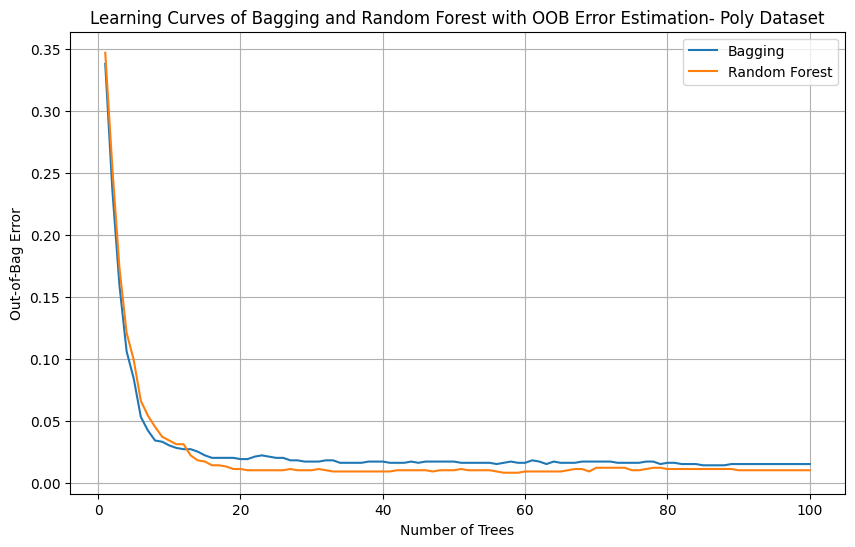

In [23]:

# Define the range of number of trees
num_trees = range(1, 101)

# Initialize lists to store OOB errors for Bagging and Random Forest
oob_errors_bagging = []
oob_errors_rf = []

# Iterate over the number of trees
for n in num_trees:
    # Initialize Bagging Classifier with DecisionTreeClassifier as the base estimator
    bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=n, oob_score=True, random_state=42)
    bagging_clf.fit(X_poly, y_poly)
    oob_errors_bagging.append(1 - bagging_clf.oob_score_)
    
    # Initialize Random Forest Classifier
    rf_clf = RandomForestClassifier(n_estimators=n, oob_score=True, random_state=42)
    rf_clf.fit(X_poly, y_poly)
    oob_errors_rf.append(1 - rf_clf.oob_score_)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(num_trees, oob_errors_bagging, label='Bagging')
plt.plot(num_trees, oob_errors_rf, label='Random Forest')
plt.title('Learning Curves of Bagging and Random Forest with OOB Error Estimation- Poly Dataset')
plt.xlabel('Number of Trees')
plt.ylabel('Out-of-Bag Error')
plt.legend()
plt.grid(True)
plt.show()

In [24]:

#Circular dataset
# Define parameters
num_samples = 500
step_size = np.pi / 2
noise_level = 0
ccp_alpha = 0.01

# Generate circular dataset with specified noise level
class1_samples, class2_samples = generate_circular_dataset_with_noise(num_samples, step_size, noise_level)
X_circular = np.vstack((class1_samples, class2_samples))
y_circular = np.hstack((np.zeros(num_samples), np.ones(num_samples)))  # class labels

# Initialize classifiers
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=ccp_alpha), random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
adaboost_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=ccp_alpha), random_state=42)
dt_clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)  # DecisionTreeClassifier with specified ccp_alpha

# Perform cross-validation
bagging_scores = cross_val_score(bagging_clf, X_circular, y_circular, cv=5)
rf_scores = cross_val_score(rf_clf, X_circular, y_circular, cv=5)
adaboost_scores = cross_val_score(adaboost_clf, X_circular, y_circular, cv=5)
dt_scores = cross_val_score(dt_clf, X_circular, y_circular, cv=5)

# Print mean accuracy scores
print("Mean Accuracy Scores:")
print("Decision Tree Classifier: ", dt_scores.mean())
print("Bagging: ", bagging_scores.mean())
print("RandomForest: ", rf_scores.mean())
print("AdaBoost: ", adaboost_scores.mean())




Mean Accuracy Scores:
Decision Tree Classifier:  0.728
Bagging:  0.716
RandomForest:  0.735
AdaBoost:  0.7270000000000001


In [50]:
#Circular dataset ccp_alpha increase
# Define parameters
num_samples = 500
step_size = np.pi / 2
noise_level = 0
ccp_alpha = 0.1

# Generate circular dataset with specified noise level
class1_samples, class2_samples = generate_circular_dataset_with_noise(num_samples, step_size, noise_level)
X_circular = np.vstack((class1_samples, class2_samples))
y_circular = np.hstack((np.zeros(num_samples), np.ones(num_samples)))  # class labels

# Initialize classifiers
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=ccp_alpha), random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
adaboost_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=ccp_alpha), random_state=42)
dt_clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)  # DecisionTreeClassifier with specified ccp_alpha

# Perform cross-validation
bagging_scores = cross_val_score(bagging_clf, X_circular, y_circular, cv=5)
rf_scores = cross_val_score(rf_clf, X_circular, y_circular, cv=5)
adaboost_scores = cross_val_score(adaboost_clf, X_circular, y_circular, cv=5)
dt_scores = cross_val_score(dt_clf, X_circular, y_circular, cv=5)

# Print mean accuracy scores
print("Mean Accuracy Scores:")
print("Decision Tree Classifier: ", dt_scores.mean())
print("Bagging: ", bagging_scores.mean())
print("RandomForest: ", rf_scores.mean())
print("AdaBoost: ", adaboost_scores.mean())



Mean Accuracy Scores:
Decision Tree Classifier:  0.491
Bagging:  0.43
RandomForest:  0.735
AdaBoost:  0.709


In [26]:
#Circular dataset noise level increase
# Define parameters
num_samples = 500
step_size = np.pi / 2
noise_level = 0.4
ccp_alpha = 0.01

# Generate circular dataset with specified noise level
class1_samples, class2_samples = generate_circular_dataset_with_noise(num_samples, step_size, noise_level)
X_circular = np.vstack((class1_samples, class2_samples))
y_circular = np.hstack((np.zeros(num_samples), np.ones(num_samples)))  # class labels

# Initialize classifiers
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=ccp_alpha), random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
adaboost_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=ccp_alpha), random_state=42)
dt_clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)  # DecisionTreeClassifier with specified ccp_alpha

# Perform cross-validation
bagging_scores = cross_val_score(bagging_clf, X_circular, y_circular, cv=5)
rf_scores = cross_val_score(rf_clf, X_circular, y_circular, cv=5)
adaboost_scores = cross_val_score(adaboost_clf, X_circular, y_circular, cv=5)
dt_scores = cross_val_score(dt_clf, X_circular, y_circular, cv=5)

# Print mean accuracy scores
print("Mean Accuracy Scores:")
print("Decision Tree Classifier: ", dt_scores.mean())
print("Bagging: ", bagging_scores.mean())
print("RandomForest: ", rf_scores.mean())
print("AdaBoost: ", adaboost_scores.mean())


Mean Accuracy Scores:
Decision Tree Classifier:  0.48599999999999993
Bagging:  0.45899999999999996
RandomForest:  0.44799999999999995
AdaBoost:  0.373


In [27]:
#POlynomial ccp_alpha limit


# Define parameters
num_samples = 500
x_range = (-10, 10)
noise_level = 0
ccp_alpha = 0.1

# Generate polynomial dataset with specified noise level
X_poly, y_poly = generate_polynomial_dataset(num_samples, x_range, noise_level)

# Initialize classifiers
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=ccp_alpha), random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
adaboost_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=ccp_alpha), random_state=42)
dt_clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)  # DecisionTreeClassifier with specified ccp_alpha

# Perform cross-validation
bagging_scores = cross_val_score(bagging_clf, X_poly, y_poly, cv=5)
rf_scores = cross_val_score(rf_clf, X_poly, y_poly, cv=5)
adaboost_scores = cross_val_score(adaboost_clf, X_poly, y_poly, cv=5)
dt_scores = cross_val_score(dt_clf, X_poly, y_poly, cv=5)

# Print mean accuracy scores
print("Mean Accuracy Scores:")
print("Decision Tree Classifier: ", dt_scores.mean())
print("Bagging: ", bagging_scores.mean())
print("RandomForest: ", rf_scores.mean())
print("AdaBoost: ", adaboost_scores.mean())


Mean Accuracy Scores:
Decision Tree Classifier:  0.744
Bagging:  0.744
RandomForest:  0.724
AdaBoost:  0.744


In [51]:
#POlynomial ccp_alpha over limit
# Define parameters
num_samples = 500
x_range = (-10, 10)
noise_level = 0
ccp_alpha = 0.01

# Generate polynomial dataset with specified noise level
X_poly, y_poly = generate_polynomial_dataset(num_samples, x_range, noise_level)

# Initialize classifiers
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=ccp_alpha), random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
adaboost_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=ccp_alpha), random_state=42)
dt_clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)  # DecisionTreeClassifier with specified ccp_alpha

# Perform cross-validation
bagging_scores = cross_val_score(bagging_clf, X_poly, y_poly, cv=5)
rf_scores = cross_val_score(rf_clf, X_poly, y_poly, cv=5)
adaboost_scores = cross_val_score(adaboost_clf, X_poly, y_poly, cv=5)
dt_scores = cross_val_score(dt_clf, X_poly, y_poly, cv=5)

# Print mean accuracy scores
print("Mean Accuracy Scores:")
print("Decision Tree Classifier: ", dt_scores.mean())
print("Bagging: ", bagging_scores.mean())
print("RandomForest: ", rf_scores.mean())
print("AdaBoost: ", adaboost_scores.mean())

Mean Accuracy Scores:
Decision Tree Classifier:  0.75
Bagging:  0.716
RandomForest:  0.724
AdaBoost:  0.75


In [47]:
#POlynomial noise icnrease
# Define parameters
num_samples = 500
x_range = (-10, 10)
noise_level = 2
ccp_alpha = 0.1

# Generate polynomial dataset with specified noise level
X_poly, y_poly = generate_polynomial_dataset(num_samples, x_range, noise_level)

# Initialize classifiers
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=ccp_alpha), random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
adaboost_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=ccp_alpha), random_state=42)
dt_clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)  # DecisionTreeClassifier with specified ccp_alpha

# Perform cross-validation
bagging_scores = cross_val_score(bagging_clf, X_poly, y_poly, cv=5)
rf_scores = cross_val_score(rf_clf, X_poly, y_poly, cv=5)
adaboost_scores = cross_val_score(adaboost_clf, X_poly, y_poly, cv=5)
dt_scores = cross_val_score(dt_clf, X_poly, y_poly, cv=5)

# Print mean accuracy scores
print("Mean Accuracy Scores:")
print("Decision Tree Classifier: ", dt_scores.mean())
print("Bagging: ", bagging_scores.mean())
print("RandomForest: ", rf_scores.mean())
print("AdaBoost: ", adaboost_scores.mean())

Mean Accuracy Scores:
Decision Tree Classifier:  0.53
Bagging:  0.624
RandomForest:  0.717
AdaBoost:  0.53


## ANswer Ensemble

Here we still made some demonstration using 2 different datasets, the polynomial and the circular, regarding the oob error:

    -Circular dataset: hade some intervals where RF had better values and others for Bg, the lowest value whas with Bg, around 23 trees, and the best for RF was close in number of trees.

    -Polynomial dataset: both methods had the same metrics, and the values overal are much lower than the other dataset.

Next we computed the accuracy for the AdaBoost, Bagging, RandomForest and DecisionTree classifiers suing cross validation with cv 5:

    -Circular dataset: 
    The results depends mostly on the noise level, a slight increase of the noise can make the classifiers don't work.
    The increase of ccp_alpha leads to a huge decrease in the accuracy for Bagging and decision tree, while Ada and RF maintein close metrics.
    If low values of noise_level and ccp_alpha all the classifiers have close results.
    
    -polynomial dataset: 
    had good performance, with RandomForest being the best result, followed by Adaboost, bagging and decisionTree.
    Increasing the noise_level drop the accuracy, but all the classifiers still have close results.
    while increasing the ccp_alpha until a certain point around 0.1 does not change the accuracy, but after that only RF keeps the accuracy, the other drops to random choice.

# Auxiliar 

IN this section we saved some plots and graphs that helped in our decisions and analysis, here we have some other distributions for the dataset, other plots for the accuracy analysis, and other for the bias variance analysis.

## Investigate method assumptions:
    Testing differents distributions

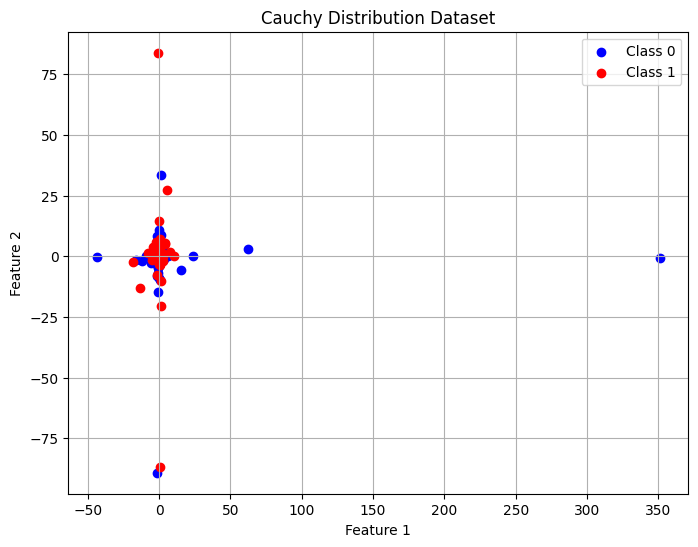

In [30]:
#Cauchy distribution

# Generate dataset using Cauchy distribution
cauchy_data_class1 = np.random.standard_cauchy(size=(100, 2))
cauchy_data_class2 = np.random.standard_cauchy(size=(100, 2))

# Plot dataset
plt.figure(figsize=(8, 6))
plt.scatter(cauchy_data_class1[:, 0], cauchy_data_class1[:, 1], color='blue', label='Class 0')
plt.scatter(cauchy_data_class2[:, 0], cauchy_data_class2[:, 1], color='red', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Cauchy Distribution Dataset')
plt.legend()
plt.grid(True)
plt.show()


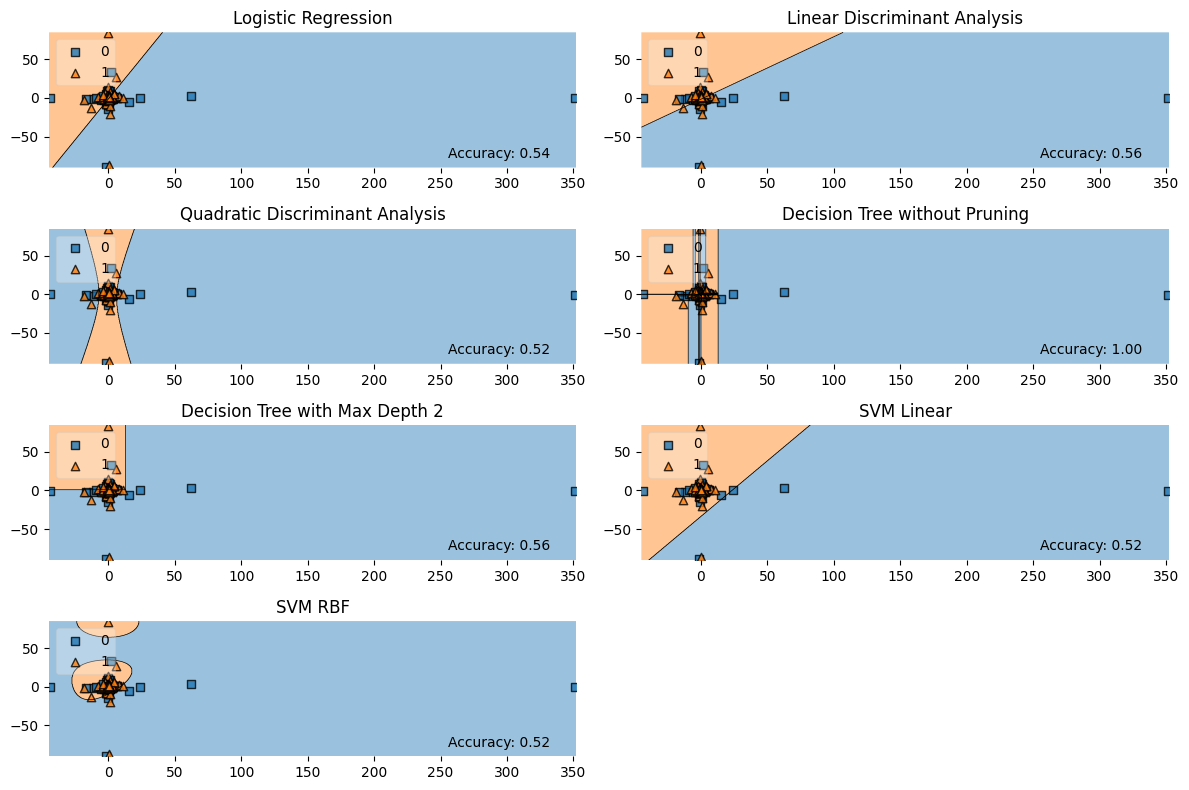

In [31]:
# Define classifiers
methods = {
    'Logistic Regression': LogisticRegression(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'Decision Tree without Pruning': DecisionTreeClassifier(),
    'Decision Tree with Max Depth 2': DecisionTreeClassifier(max_depth=2),
    'SVM Linear': SVC(kernel='linear', probability=True),
    'SVM RBF': SVC(kernel='rbf', probability=True)
}

# Generate dataset using Cauchy distribution

X_cauchy = np.vstack((cauchy_data_class1, cauchy_data_class2))
y_cauchy = np.hstack((np.zeros(100), np.ones(100)))  # class labels

# Determine the number of rows and columns for subplots
num_classifiers = len(methods)
num_cols = 2
num_rows = (num_classifiers + num_cols - 1) // num_cols

plt.figure(figsize=(12, 8))  # Increase figsize for larger subplots
for i, (name, clf) in enumerate(methods.items(), start=1):
    plt.subplot(num_rows, num_cols, i)
    clf.fit(X_cauchy, y_cauchy)
    plot_decision_regions(X_cauchy, y_cauchy.astype(int), clf=clf, legend=2)
    plt.title(name)

    # Calculate and annotate accuracy
    acc = clf.score(X_cauchy, y_cauchy)
    plt.text(0.95, 0.05, f'Accuracy: {acc:.2f}', ha='right', va='bottom', transform=plt.gca().transAxes, fontsize=10)

plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust spacing between subplots
plt.tight_layout()
plt.show()


In [32]:
for name, clf in methods.items():
    scores = cross_val_score(clf, X_cauchy, y_cauchy, cv=5)
    print(f'{name} - Mean Accuracy: {scores.mean():.2f}, Std Dev: {scores.std():.2f}')

Logistic Regression - Mean Accuracy: 0.53, Std Dev: 0.07
Linear Discriminant Analysis - Mean Accuracy: 0.51, Std Dev: 0.04
Quadratic Discriminant Analysis - Mean Accuracy: 0.51, Std Dev: 0.01
Decision Tree without Pruning - Mean Accuracy: 0.49, Std Dev: 0.07
Decision Tree with Max Depth 2 - Mean Accuracy: 0.47, Std Dev: 0.03
SVM Linear - Mean Accuracy: 0.51, Std Dev: 0.02
SVM RBF - Mean Accuracy: 0.48, Std Dev: 0.01


In [ ]:

# Define parameters
num_samples = 100
step_size = np.pi / 2
noise_level = 0
ccp_alpha = 0.01
# Generate dataset using Cauchy distribution
cauchy_data_class1 = np.random.standard_cauchy(size=(100, 2))
cauchy_data_class2 = np.random.standard_cauchy(size=(100, 2))

class1_samples=cauchy_data_class1
class2_samples=cauchy_data_class2
# Generate circular dataset with specified noise level

X_circular = np.vstack((class1_samples, class2_samples))
y_circular = np.hstack((np.zeros(num_samples), np.ones(num_samples)))  # class labels

# Initialize classifiers
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=ccp_alpha), random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
adaboost_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=ccp_alpha), random_state=42)
dt_clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)  # DecisionTreeClassifier with specified ccp_alpha

# Perform cross-validation
bagging_scores = cross_val_score(bagging_clf, X_circular, y_circular, cv=5)
rf_scores = cross_val_score(rf_clf, X_circular, y_circular, cv=5)
adaboost_scores = cross_val_score(adaboost_clf, X_circular, y_circular, cv=5)
dt_scores = cross_val_score(dt_clf, X_circular, y_circular, cv=5)

# Print mean accuracy scores
print("Mean Accuracy Scores:")
print("Decision Tree Classifier: ", dt_scores.mean())
print("Bagging: ", bagging_scores.mean())
print("RandomForest: ", rf_scores.mean())
print("AdaBoost: ", adaboost_scores.mean())


Mean Accuracy Scores:
Decision Tree Classifier:  0.475
Bagging:  0.5399999999999999
RandomForest:  0.515
AdaBoost:  0.5349999999999999


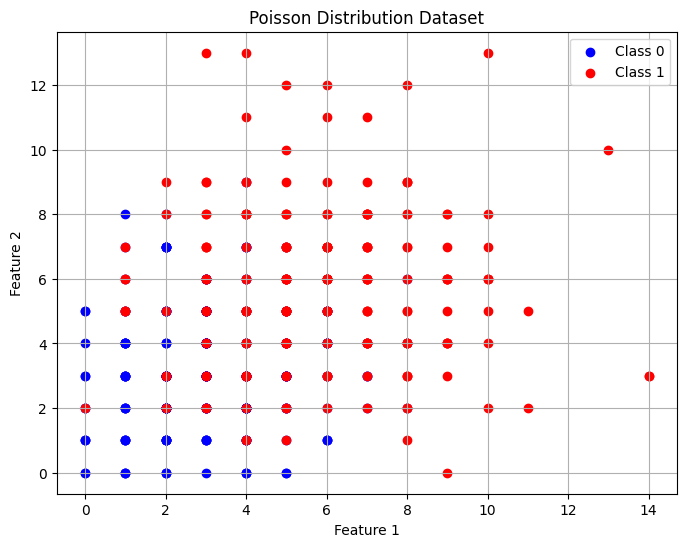

In [35]:
#Poisson Distribution
# Generate dataset using Poisson distribution
poisson_data_class1 = np.random.poisson(lam=3, size=(200, 2))
poisson_data_class2 = np.random.poisson(lam=6, size=(200, 2))

# Plot dataset
plt.figure(figsize=(8, 6))
plt.scatter(poisson_data_class1[:, 0], poisson_data_class1[:, 1], color='blue', label='Class 0')
plt.scatter(poisson_data_class2[:, 0], poisson_data_class2[:, 1], color='red', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Poisson Distribution Dataset')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

# Define parameters
num_samples =200
step_size = np.pi / 2
noise_level = 0
ccp_alpha = 0.01
# Generate dataset using Cauchy distribution
poisson_data_class1 = np.random.poisson(lam=3, size=(200, 2))
poisson_data_class2 = np.random.poisson(lam=6, size=(200, 2))

class1_samples=poisson_data_class1
class2_samples=poisson_data_class2
# Generate  dataset with specified noise level

X_circular = np.vstack((class1_samples, class2_samples))
y_circular = np.hstack((np.zeros(num_samples), np.ones(num_samples)))  # class labels

# Initialize classifiers
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=ccp_alpha), random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
adaboost_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=ccp_alpha), random_state=42)
dt_clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)  # DecisionTreeClassifier with specified ccp_alpha

# Perform cross-validation
bagging_scores = cross_val_score(bagging_clf, X_circular, y_circular, cv=5)
rf_scores = cross_val_score(rf_clf, X_circular, y_circular, cv=5)
adaboost_scores = cross_val_score(adaboost_clf, X_circular, y_circular, cv=5)
dt_scores = cross_val_score(dt_clf, X_circular, y_circular, cv=5)

# Print mean accuracy scores
print("Mean Accuracy Scores:")
print("Decision Tree Classifier: ", dt_scores.mean())
print("Bagging: ", bagging_scores.mean())
print("RandomForest: ", rf_scores.mean())
print("AdaBoost: ", adaboost_scores.mean())

Mean Accuracy Scores:
Decision Tree Classifier:  0.85
Bagging:  0.8550000000000001
RandomForest:  0.8425
AdaBoost:  0.8475000000000001


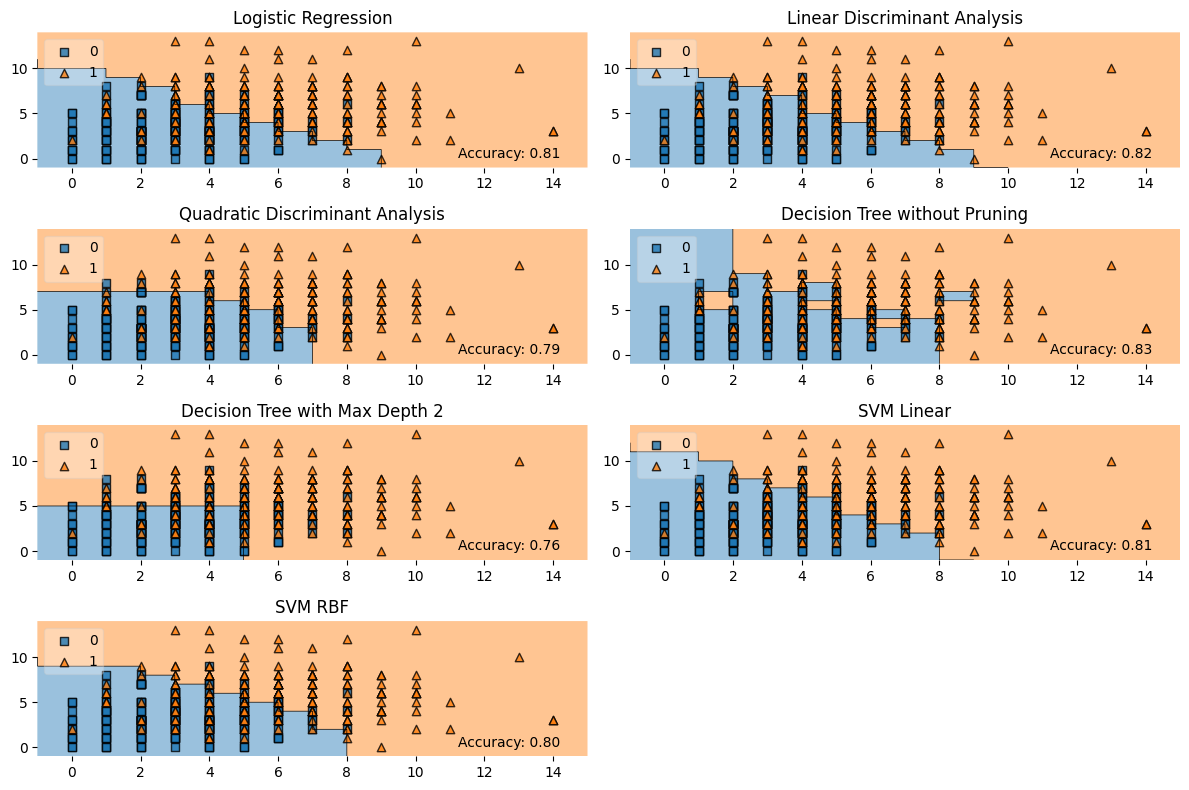

In [36]:

X_poisson = np.vstack((poisson_data_class1, poisson_data_class2))
y_poisson = np.hstack((np.zeros(200), np.ones(200)))  # class labels

# Determine the number of rows and columns for subplots
num_classifiers = len(methods)
num_cols = 2
num_rows = (num_classifiers + num_cols - 1) // num_cols

plt.figure(figsize=(12, 8))  # Increase figsize for larger subplots
for i, (name, clf) in enumerate(methods.items(), start=1):
    plt.subplot(num_rows, num_cols, i)
    clf.fit(X_poisson, y_poisson)
    plot_decision_regions(X_poisson, y_poisson.astype(int), clf=clf, legend=2)
    plt.title(name)

    # Calculate and annotate accuracy
    acc = clf.score(X_poisson, y_poisson)
    plt.text(0.95, 0.05, f'Accuracy: {acc:.2f}', ha='right', va='bottom', transform=plt.gca().transAxes, fontsize=10)

plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [37]:
for name, clf in methods.items():
    scores = cross_val_score(clf, X_poisson, y_poisson, cv=5)
    print(f'{name} - Mean Accuracy: {scores.mean():.2f}, Std Dev: {scores.std():.2f}')

Logistic Regression - Mean Accuracy: 0.80, Std Dev: 0.04
Linear Discriminant Analysis - Mean Accuracy: 0.79, Std Dev: 0.04
Quadratic Discriminant Analysis - Mean Accuracy: 0.78, Std Dev: 0.03
Decision Tree without Pruning - Mean Accuracy: 0.76, Std Dev: 0.04
Decision Tree with Max Depth 2 - Mean Accuracy: 0.75, Std Dev: 0.01
SVM Linear - Mean Accuracy: 0.79, Std Dev: 0.04
SVM RBF - Mean Accuracy: 0.79, Std Dev: 0.04


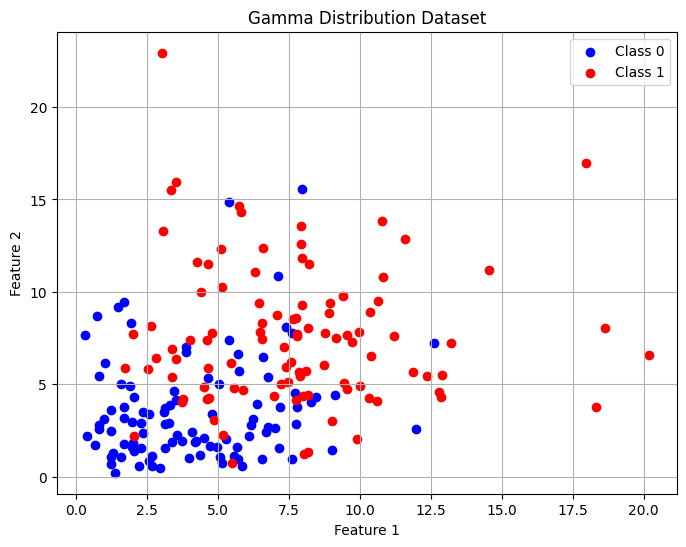

In [38]:
# Gamma Distribution

# Generate dataset using Gamma distribution
gamma_data_class1 = np.random.gamma(shape=2, scale=2, size=(100, 2))
gamma_data_class2 = np.random.gamma(shape=4, scale=2, size=(100, 2))

# Plot dataset
plt.figure(figsize=(8, 6))
plt.scatter(gamma_data_class1[:, 0], gamma_data_class1[:, 1], color='blue', label='Class 0')
plt.scatter(gamma_data_class2[:, 0], gamma_data_class2[:, 1], color='red', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gamma Distribution Dataset')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:

# Define parameters
num_samples =100
step_size = np.pi / 2
noise_level = 0
ccp_alpha = 0.01
# Generate dataset using Cauchy distribution
gamma_data_class1 = np.random.gamma(shape=2, scale=2, size=(100, 2))
gamma_data_class2 = np.random.gamma(shape=4, scale=2, size=(100, 2))

class1_samples=gamma_data_class1
class2_samples=gamma_data_class2
# Generate  dataset with specified noise level

X_circular = np.vstack((class1_samples, class2_samples))
y_circular = np.hstack((np.zeros(num_samples), np.ones(num_samples)))  # class labels

# Initialize classifiers
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=ccp_alpha), random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
adaboost_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=ccp_alpha), random_state=42)
dt_clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)  # DecisionTreeClassifier with specified ccp_alpha

# Perform cross-validation
bagging_scores = cross_val_score(bagging_clf, X_circular, y_circular, cv=5)
rf_scores = cross_val_score(rf_clf, X_circular, y_circular, cv=5)
adaboost_scores = cross_val_score(adaboost_clf, X_circular, y_circular, cv=5)
dt_scores = cross_val_score(dt_clf, X_circular, y_circular, cv=5)

# Print mean accuracy scores
print("Mean Accuracy Scores:")
print("Decision Tree Classifier: ", dt_scores.mean())
print("Bagging: ", bagging_scores.mean())
print("RandomForest: ", rf_scores.mean())
print("AdaBoost: ", adaboost_scores.mean())

Mean Accuracy Scores:
Decision Tree Classifier:  0.7699999999999999
Bagging:  0.76
RandomForest:  0.7949999999999999
AdaBoost:  0.755


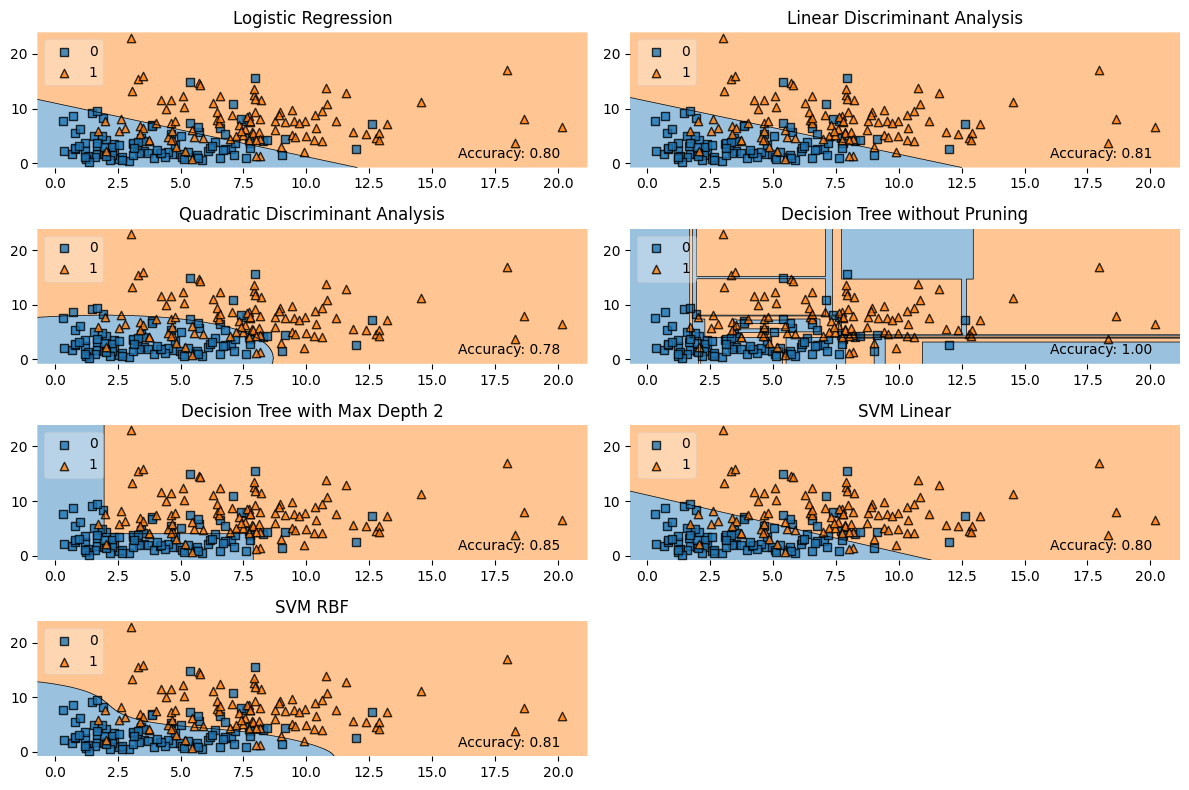

In [39]:

X_gamma = np.vstack((gamma_data_class1, gamma_data_class2))
y_gamma = np.hstack((np.zeros(100), np.ones(100)))  # class labels

# Determine the number of rows and columns for subplots
num_classifiers = len(methods)
num_cols = 2
num_rows = (num_classifiers + num_cols - 1) // num_cols

plt.figure(figsize=(12, 8))  # Increase figsize for larger subplots
for i, (name, clf) in enumerate(methods.items(), start=1):
    plt.subplot(num_rows, num_cols, i)
    clf.fit(X_gamma, y_gamma)
    plot_decision_regions(X_gamma, y_gamma.astype(int), clf=clf, legend=2)
    plt.title(name)

    # Calculate and annotate accuracy
    acc = clf.score(X_gamma, y_gamma)
    plt.text(0.95, 0.05, f'Accuracy: {acc:.2f}', ha='right', va='bottom', transform=plt.gca().transAxes, fontsize=10)

plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [40]:
for name, clf in methods.items():
    scores = cross_val_score(clf, X_gamma, y_gamma, cv=5)
    print(f'{name} - Mean Accuracy: {scores.mean():.2f}, Std Dev: {scores.std():.2f}')

Logistic Regression - Mean Accuracy: 0.78, Std Dev: 0.05
Linear Discriminant Analysis - Mean Accuracy: 0.80, Std Dev: 0.04
Quadratic Discriminant Analysis - Mean Accuracy: 0.77, Std Dev: 0.03
Decision Tree without Pruning - Mean Accuracy: 0.75, Std Dev: 0.03
Decision Tree with Max Depth 2 - Mean Accuracy: 0.83, Std Dev: 0.05
SVM Linear - Mean Accuracy: 0.77, Std Dev: 0.05
SVM RBF - Mean Accuracy: 0.78, Std Dev: 0.04


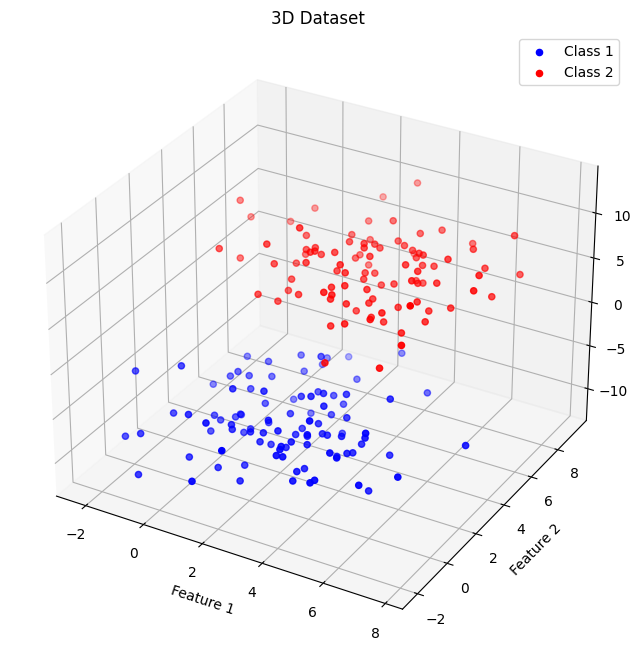

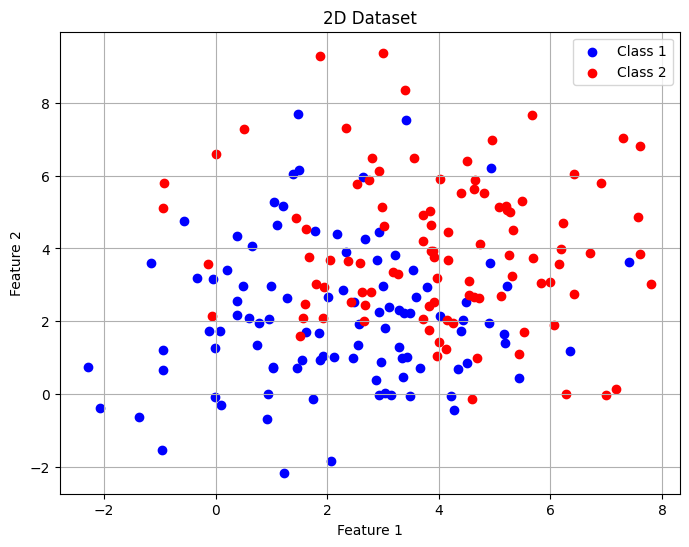

In [41]:
# HIgher dimension dataset
# Generate random points for class 1 in 3D space
num_samples = 100
class1_samples_3d = np.random.normal(loc=[2, 2, -8], scale=2, size=(num_samples, 3))

# Generate random points for class 2 in 3D space
class2_samples_3d = np.random.normal(loc=[4, 4, 8], scale=2, size=(num_samples, 3))

# Visualize the 3D dataset
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(class1_samples_3d[:, 0], class1_samples_3d[:, 1], class1_samples_3d[:, 2], c='blue', label='Class 1')
ax.scatter(class2_samples_3d[:, 0], class2_samples_3d[:, 1], class2_samples_3d[:, 2], c='red', label='Class 2')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('3D Dataset')
plt.legend()
plt.show()

# Project the 3D points onto a 2D plane (ignore one dimension)
class1_samples_2d = class1_samples_3d[:, :2]  # Project onto the first two dimensions
class2_samples_2d = class2_samples_3d[:, :2]

# Visualize the 2D dataset
plt.figure(figsize=(8, 6))
plt.scatter(class1_samples_2d[:, 0], class1_samples_2d[:, 1], c='blue', label='Class 1')
plt.scatter(class2_samples_2d[:, 0], class2_samples_2d[:, 1], c='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Dataset')
plt.legend()
plt.grid(True)
plt.show()

In [56]:

# Define parameters

step_size = np.pi / 2
noise_level = 0
ccp_alpha = 0.01

num_samples = 100
class1_samples_3d = np.random.normal(loc=[2, 2, -8], scale=2, size=(num_samples, 3))

# Generate random points for class 2 in 3D space
class2_samples_3d = np.random.normal(loc=[4, 4, 8], scale=2, size=(num_samples, 3))

class1_samples=class1_samples_3d
class2_samples=class2_samples_3d
# Generate  dataset with specified noise level

X_circular = np.vstack((class1_samples, class2_samples))
y_circular = np.hstack((np.zeros(num_samples), np.ones(num_samples)))  # class labels

# Initialize classifiers
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=ccp_alpha), random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
adaboost_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=ccp_alpha), random_state=42)
dt_clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)  # DecisionTreeClassifier with specified ccp_alpha

# Perform cross-validation
bagging_scores = cross_val_score(bagging_clf, X_circular, y_circular, cv=5)
rf_scores = cross_val_score(rf_clf, X_circular, y_circular, cv=5)
adaboost_scores = cross_val_score(adaboost_clf, X_circular, y_circular, cv=5)
dt_scores = cross_val_score(dt_clf, X_circular, y_circular, cv=5)

# Print mean accuracy scores
print("Mean Accuracy Scores:")
print("Decision Tree Classifier: ", dt_scores.mean())
print("Bagging: ", bagging_scores.mean())
print("RandomForest: ", rf_scores.mean())
print("AdaBoost: ", adaboost_scores.mean())

Mean Accuracy Scores:
Decision Tree Classifier:  1.0
Bagging:  1.0
RandomForest:  1.0
AdaBoost:  1.0


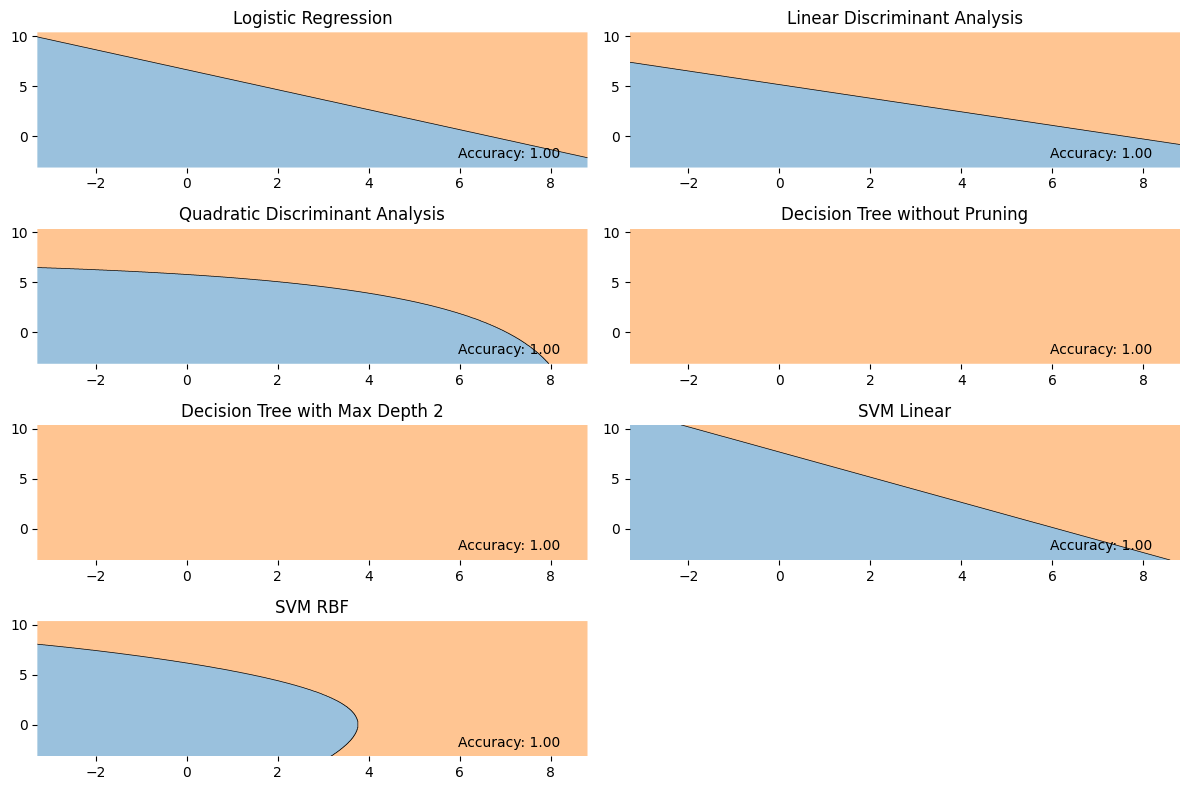

Logistic Regression - Mean Accuracy: 1.00, Std Dev: 0.00
Linear Discriminant Analysis - Mean Accuracy: 1.00, Std Dev: 0.00
Quadratic Discriminant Analysis - Mean Accuracy: 1.00, Std Dev: 0.00
Decision Tree without Pruning - Mean Accuracy: 1.00, Std Dev: 0.00
Decision Tree with Max Depth 2 - Mean Accuracy: 1.00, Std Dev: 0.00
SVM Linear - Mean Accuracy: 1.00, Std Dev: 0.00
SVM RBF - Mean Accuracy: 1.00, Std Dev: 0.00


In [42]:

# Define classifiers
methods = {
    'Logistic Regression': LogisticRegression(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'Decision Tree without Pruning': DecisionTreeClassifier(),
    'Decision Tree with Max Depth 2': DecisionTreeClassifier(max_depth=2),
    'SVM Linear': SVC(kernel='linear', probability=True),
    'SVM RBF': SVC(kernel='rbf', probability=True)
}



# Combine class 1 and class 2 samples
X_3d = np.vstack((class1_samples_3d, class2_samples_3d))
y_3d = np.hstack((np.zeros(num_samples), np.ones(num_samples)))  # class labels

# Apply classifiers and visualize decision regions
plt.figure(figsize=(12, 8))
for i, (name, clf) in enumerate(methods.items(), start=1):
    plt.subplot(num_rows, num_cols, i)
    clf.fit(X_3d, y_3d)
    plot_decision_regions(X_3d, y_3d.astype(int), clf=clf, legend=2, filler_feature_values={2: np.mean(X_3d[:, 2])})
    plt.title(name)

    # Calculate and annotate accuracy
    acc = clf.score(X_3d, y_3d)
    plt.text(0.95, 0.05, f'Accuracy: {acc:.2f}', ha='right', va='bottom', transform=plt.gca().transAxes, fontsize=10)

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.tight_layout()
plt.show()

# Apply cross-validation
for name, clf in methods.items():
    scores = cross_val_score(clf, X_3d, y_3d, cv=5)
    print(f'{name} - Mean Accuracy: {scores.mean():.2f}, Std Dev: {scores.std():.2f}')

## Bias Variance

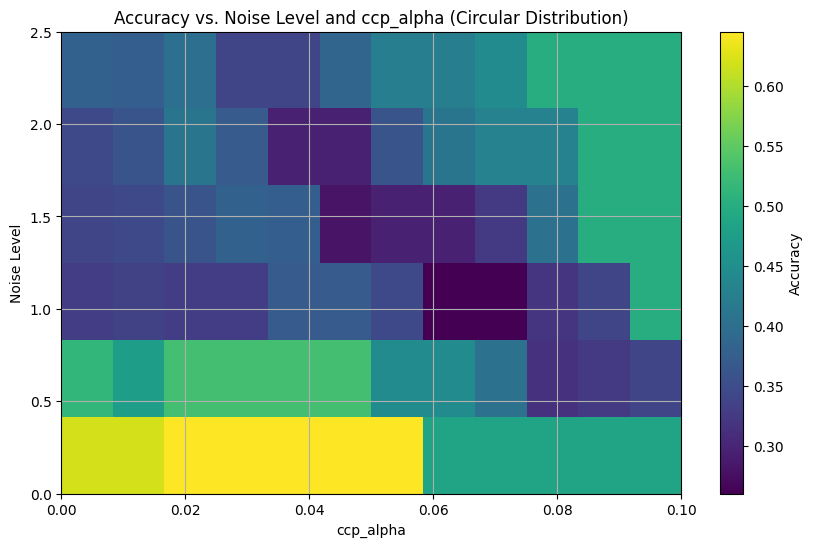

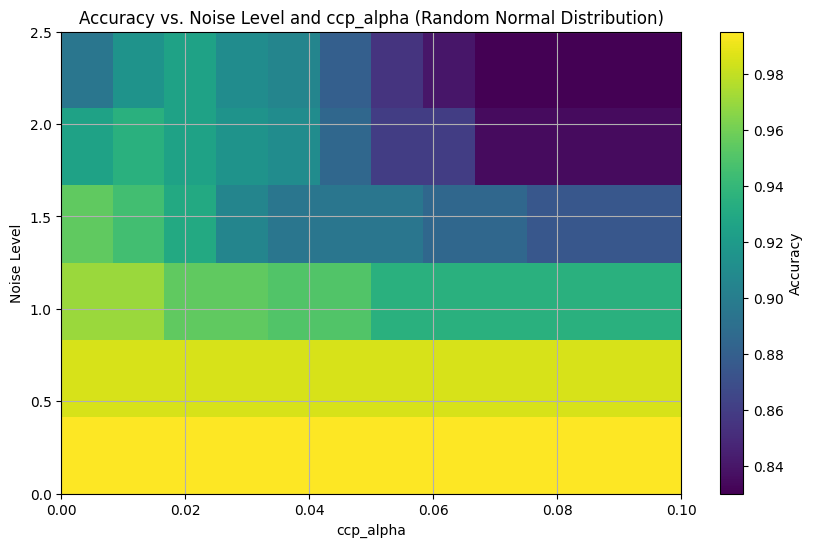

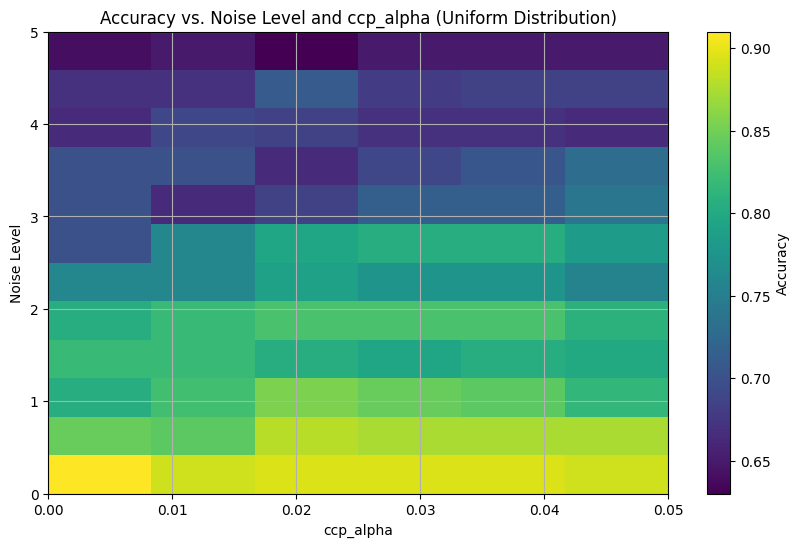

In [43]:
# Histogram2d for better visualization of accuracy variance with  noise and ccp_alpha


# Function to generate circular distribution dataset with noise
def generate_circular_dataset_with_noise(num_samples, step_size, noise_level):
    np.random.seed(42)  # for reproducibility
    # Class 1: Points uniformly distributed around a circle with radius 5
    theta1 = np.linspace(0, 2*np.pi, num_samples)
    class1_samples = np.array([5*np.cos(theta1), 5*np.sin(theta1)]).T
    # Class 2: Points uniformly distributed around another circle with radius 5 + step_size
    theta2 = np.linspace(step_size, 2*np.pi + step_size, num_samples)
    class2_samples = np.array([(5+step_size)*np.cos(theta2), (5+step_size)*np.sin(theta2)]).T
    # Add noise to the dataset
    class1_samples += np.random.normal(loc=0, scale=noise_level, size=(num_samples, 2))
    class2_samples += np.random.normal(loc=0, scale=noise_level, size=(num_samples, 2))
    return class1_samples, class2_samples

# Function to generate random normal distribution dataset with noise
def generate_random_normal_dataset(num_samples, noise_level):
    np.random.seed(42)  # for reproducibility
    # Class 1: Random normal distribution with mean 0 and standard deviation 1
    class1_samples = np.random.normal(loc=0, scale=1, size=(num_samples, 2))
    # Class 2: Random normal distribution with mean 5 and standard deviation 1
    class2_samples = np.random.normal(loc=5, scale=1, size=(num_samples, 2))
    # Add noise to the dataset
    class1_samples += np.random.normal(loc=0, scale=noise_level, size=(num_samples, 2))
    class2_samples += np.random.normal(loc=0, scale=noise_level, size=(num_samples, 2))
    return class1_samples, class2_samples

# Function to generate uniform distribution dataset with noise
def generate_uniform_dataset_with_noise(num_samples, noise_level):
    np.random.seed(42)  # for reproducibility
    # Class 1: Uniform distribution within a square centered at (0, 0)
    class1_samples = np.random.uniform(low=-5, high=5, size=(num_samples, 2))
    # Class 2: Uniform distribution within a square centered at (5, 5)
    class2_samples = np.random.uniform(low=0, high=10, size=(num_samples, 2))
    # Add noise to the dataset
    class1_samples += np.random.normal(loc=0, scale=noise_level, size=(num_samples, 2))
    class2_samples += np.random.normal(loc=0, scale=noise_level, size=(num_samples, 2))
    return class1_samples, class2_samples

# Perform cross-validation to calculate accuracies for a given combination of noise level and ccp_alpha for circular dataset
def calculate_accuracy_circular(noise_level, ccp_alpha):
    # Generate circular distribution dataset with noise
    class1_samples, class2_samples = generate_circular_dataset_with_noise(num_samples, step_size, noise_level)
    X = np.vstack((class1_samples, class2_samples))
    y = np.hstack((np.zeros(num_samples), np.ones(num_samples)))  # class labels

    # Initialize decision tree classifier with specified ccp_alpha
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)

    # Perform cross-validation
    cv_scores = cross_val_score(clf, X, y, cv=5)
    accuracy = np.mean(cv_scores)
    return accuracy

# Perform cross-validation to calculate accuracies for a given combination of noise level and ccp_alpha for random normal dataset
def calculate_accuracy_random(noise_level, ccp_alpha):
    # Generate random normal distribution dataset with noise
    class1_samples, class2_samples = generate_random_normal_dataset(num_samples, noise_level)
    X = np.vstack((class1_samples, class2_samples))
    y = np.hstack((np.zeros(num_samples), np.ones(num_samples)))  # class labels

    # Initialize decision tree classifier with specified ccp_alpha
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)

    # Perform cross-validation
    cv_scores = cross_val_score(clf, X, y, cv=5)
    accuracy = np.mean(cv_scores)
    return accuracy

# Perform cross-validation to calculate accuracies for a given combination of noise level and ccp_alpha for uniform dataset
def calculate_accuracy_uniform(noise_level, ccp_alpha):
    # Generate uniform distribution dataset with noise
    class1_samples, class2_samples = generate_uniform_dataset_with_noise(num_samples, noise_level)
    X = np.vstack((class1_samples, class2_samples))
    y = np.hstack((np.zeros(num_samples), np.ones(num_samples)))  # class labels

    # Initialize decision tree classifier with specified ccp_alpha
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)

    # Perform cross-validation
    cv_scores = cross_val_score(clf, X, y, cv=5)
    accuracy = np.mean(cv_scores)
    return accuracy

# Define range of noise levels and ccp_alpha values
noise_levels = np.linspace(0, 2.5, 6)
ccp_alphas = np.linspace(0, 0.1, 12)

# Calculate accuracies for all combinations of noise levels and ccp_alpha values for circular distribution dataset
accuracies_circular = np.zeros((len(noise_levels), len(ccp_alphas)))
for i, noise_level in enumerate(noise_levels):
    for j, ccp_alpha in enumerate(ccp_alphas):
        accuracies_circular[i, j] = calculate_accuracy_circular(noise_level, ccp_alpha)

# Plot heatmap of accuracy for circular distribution dataset
plt.figure(figsize=(10, 6))
plt.imshow(accuracies_circular, extent=[ccp_alphas.min(), ccp_alphas.max(), noise_levels.min(), noise_levels.max()], aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Accuracy')
plt.title('Accuracy vs. Noise Level and ccp_alpha (Circular Distribution)')
plt.xlabel('ccp_alpha')
plt.ylabel('Noise Level')
plt.grid(True)
plt.show()

# Calculate accuracies for all combinations of noise levels and ccp_alpha values for random normal distribution dataset
accuracies_random = np.zeros((len(noise_levels), len(ccp_alphas)))
for i, noise_level in enumerate(noise_levels):
    for j, ccp_alpha in enumerate(ccp_alphas):
        accuracies_random[i, j] = calculate_accuracy_random(noise_level, ccp_alpha)

# Plot heatmap of accuracy for random normal distribution dataset
plt.figure(figsize=(10, 6))
plt.imshow(accuracies_random, extent=[ccp_alphas.min(), ccp_alphas.max(), noise_levels.min(), noise_levels.max()], aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Accuracy')
plt.title('Accuracy vs. Noise Level and ccp_alpha (Random Normal Distribution)')
plt.xlabel('ccp_alpha')
plt.ylabel('Noise Level')
plt.grid(True)
plt.show()

# Define range of noise levels and ccp_alpha values for uniform dataset
noise_levels_uniform = np.linspace(0, 5, 12)
ccp_alphas_uniform = np.linspace(0, 0.05, 6)

# Calculate accuracies for all combinations of noise levels and ccp_alpha values for uniform distribution dataset
accuracies_uniform = np.zeros((len(noise_levels_uniform), len(ccp_alphas_uniform)))
for i, noise_level in enumerate(noise_levels_uniform):
    for j, ccp_alpha in enumerate(ccp_alphas_uniform):
        accuracies_uniform[i, j] = calculate_accuracy_uniform(noise_level, ccp_alpha)

# Plot heatmap of accuracy for uniform distribution dataset
plt.figure(figsize=(10, 6))
plt.imshow(accuracies_uniform, extent=[ccp_alphas_uniform.min(), ccp_alphas_uniform.max(), noise_levels_uniform.min(), noise_levels_uniform.max()], aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Accuracy')
plt.title('Accuracy vs. Noise Level and ccp_alpha (Uniform Distribution)')
plt.xlabel('ccp_alpha')
plt.ylabel('Noise Level')
plt.grid(True)
plt.show()




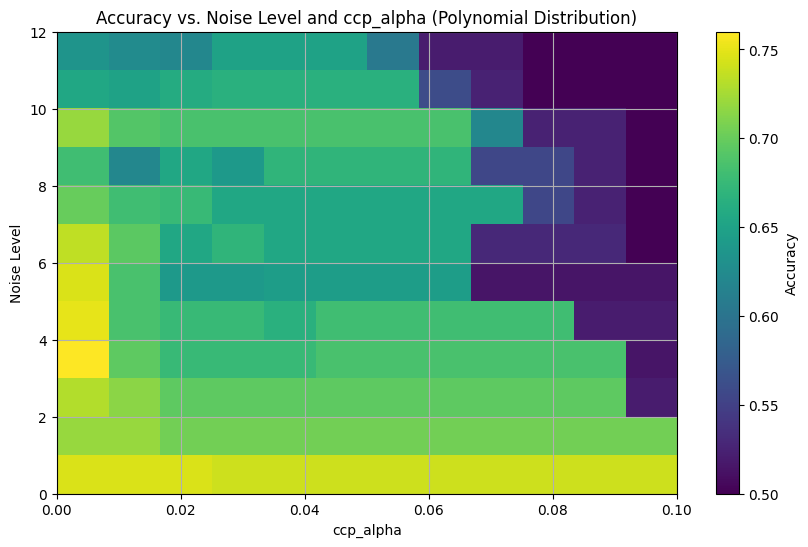

In [44]:
# Perform cross-validation to calculate accuracies for a given combination of noise level and ccp_alpha for polynomial dataset
def calculate_accuracy_polynomial(x_range, noise_level, ccp_alpha):
    # Generate polynomial distribution dataset with noise
    X_poly, y_poly = generate_polynomial_dataset(num_samples, x_range, noise_level)

    # Initialize decision tree classifier with specified ccp_alpha
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)

    # Perform cross-validation
    cv_scores = cross_val_score(clf, X_poly, y_poly, cv=5)
    accuracy = np.mean(cv_scores)
    return accuracy

# Define range of x values and noise levels for polynomial dataset
x_range = (-10, 10)
noise_levels_poly = np.linspace(0, 12, 12)

# Calculate accuracies for all combinations of noise levels and ccp_alpha values for polynomial dataset
accuracies_polynomial = np.zeros((len(noise_levels_poly), len(ccp_alphas)))
for i, noise_level in enumerate(noise_levels_poly):
    for j, ccp_alpha in enumerate(ccp_alphas):
        accuracies_polynomial[i, j] = calculate_accuracy_polynomial(x_range, noise_level, ccp_alpha)

# Plot heatmap of accuracy for polynomial dataset
plt.figure(figsize=(10, 6))
plt.imshow(accuracies_polynomial, extent=[ccp_alphas.min(), ccp_alphas.max(), noise_levels_poly.min(), noise_levels_poly.max()], aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(label='Accuracy')
plt.title('Accuracy vs. Noise Level and ccp_alpha (Polynomial Distribution)')
plt.xlabel('ccp_alpha')
plt.ylabel('Noise Level')
plt.grid(True)
plt.show()


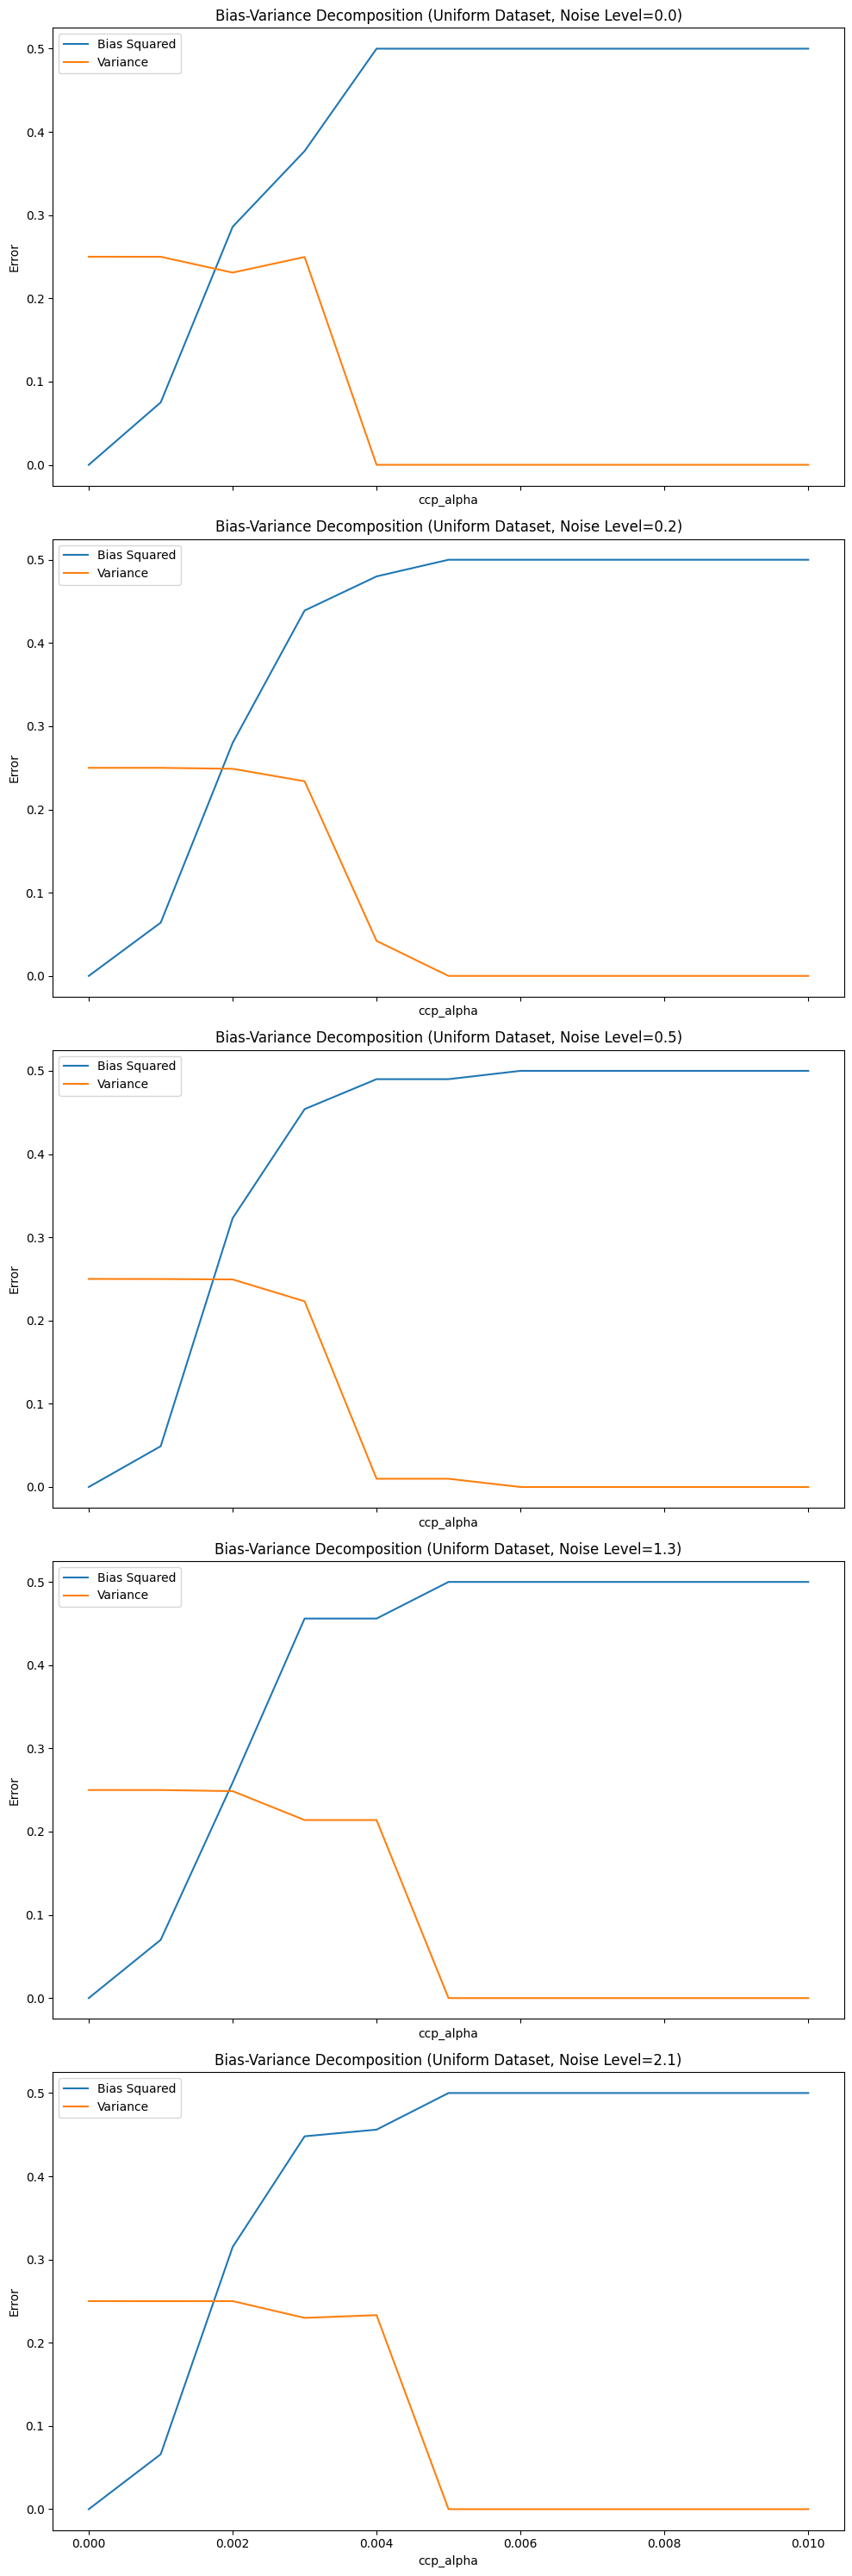

In [45]:
# Uniform dataset bias variance:
# Uniform dataset
# Define parameters
num_samples = 500
noise_levels = [0.0, 0.2, 0.5, 1.3, 2.1]
ccp_alphas = np.linspace(0, 0.01, 11)

# Initialize lists to store bias and variance for each noise level
bias_squared_all_uniform = []
variance_all_uniform = []

# Iterate over different noise levels
for noise_level in noise_levels:
    # Generate uniform dataset
    class1_samples, class2_samples = generate_uniform_dataset(num_samples, noise_level)
    X_uniform = np.vstack((class1_samples, class2_samples))
    y_uniform = np.hstack((np.zeros(num_samples), np.ones(num_samples)))  # class labels
    
    # Initialize lists to store predictions
    predictions_all = []

    # Iterate over different ccp_alpha values
    for ccp_alpha in ccp_alphas:
        # Initialize lists to store predictions
        predictions = []

        # Fit decision tree classifier
        clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)
        clf.fit(X_uniform, y_uniform)

        # Make predictions on each sample
        for _ in range(100):
            y_pred = clf.predict(X_uniform)
            predictions.append(y_pred)
        predictions_all.append(predictions)
    
    # Reshape y_uniform to match the shape of avg_predictions
    y_uniform_reshaped = np.tile(y_uniform.reshape(1, -1), (11, 1))

    # Calculate bias squared and variance
    avg_predictions = np.mean(predictions_all, axis=1)
    bias_squared = np.mean((avg_predictions - y_uniform_reshaped) ** 2, axis=1)
    variance = np.mean(np.var(predictions_all, axis=2), axis=1)
    
    # Store bias and variance for current noise level
    bias_squared_all_uniform.append(bias_squared)
    variance_all_uniform.append(variance)

# Create subplots for each noise level
fig, axs = plt.subplots(len(noise_levels), 1, figsize=(10, 6 * len(noise_levels)), sharex=True)

# Iterate over different noise levels
for i, noise_level in enumerate(noise_levels):
    # Plot bias and variance for current noise level
    axs[i].plot(ccp_alphas, bias_squared_all_uniform[i], label='Bias Squared')
    axs[i].plot(ccp_alphas, variance_all_uniform[i], label='Variance')
    
    # Set title and labels
    axs[i].set_title(f'Bias-Variance Decomposition (Uniform Dataset, Noise Level={noise_level})')
    axs[i].set_xlabel('ccp_alpha')
    axs[i].set_ylabel('Error')
    axs[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()


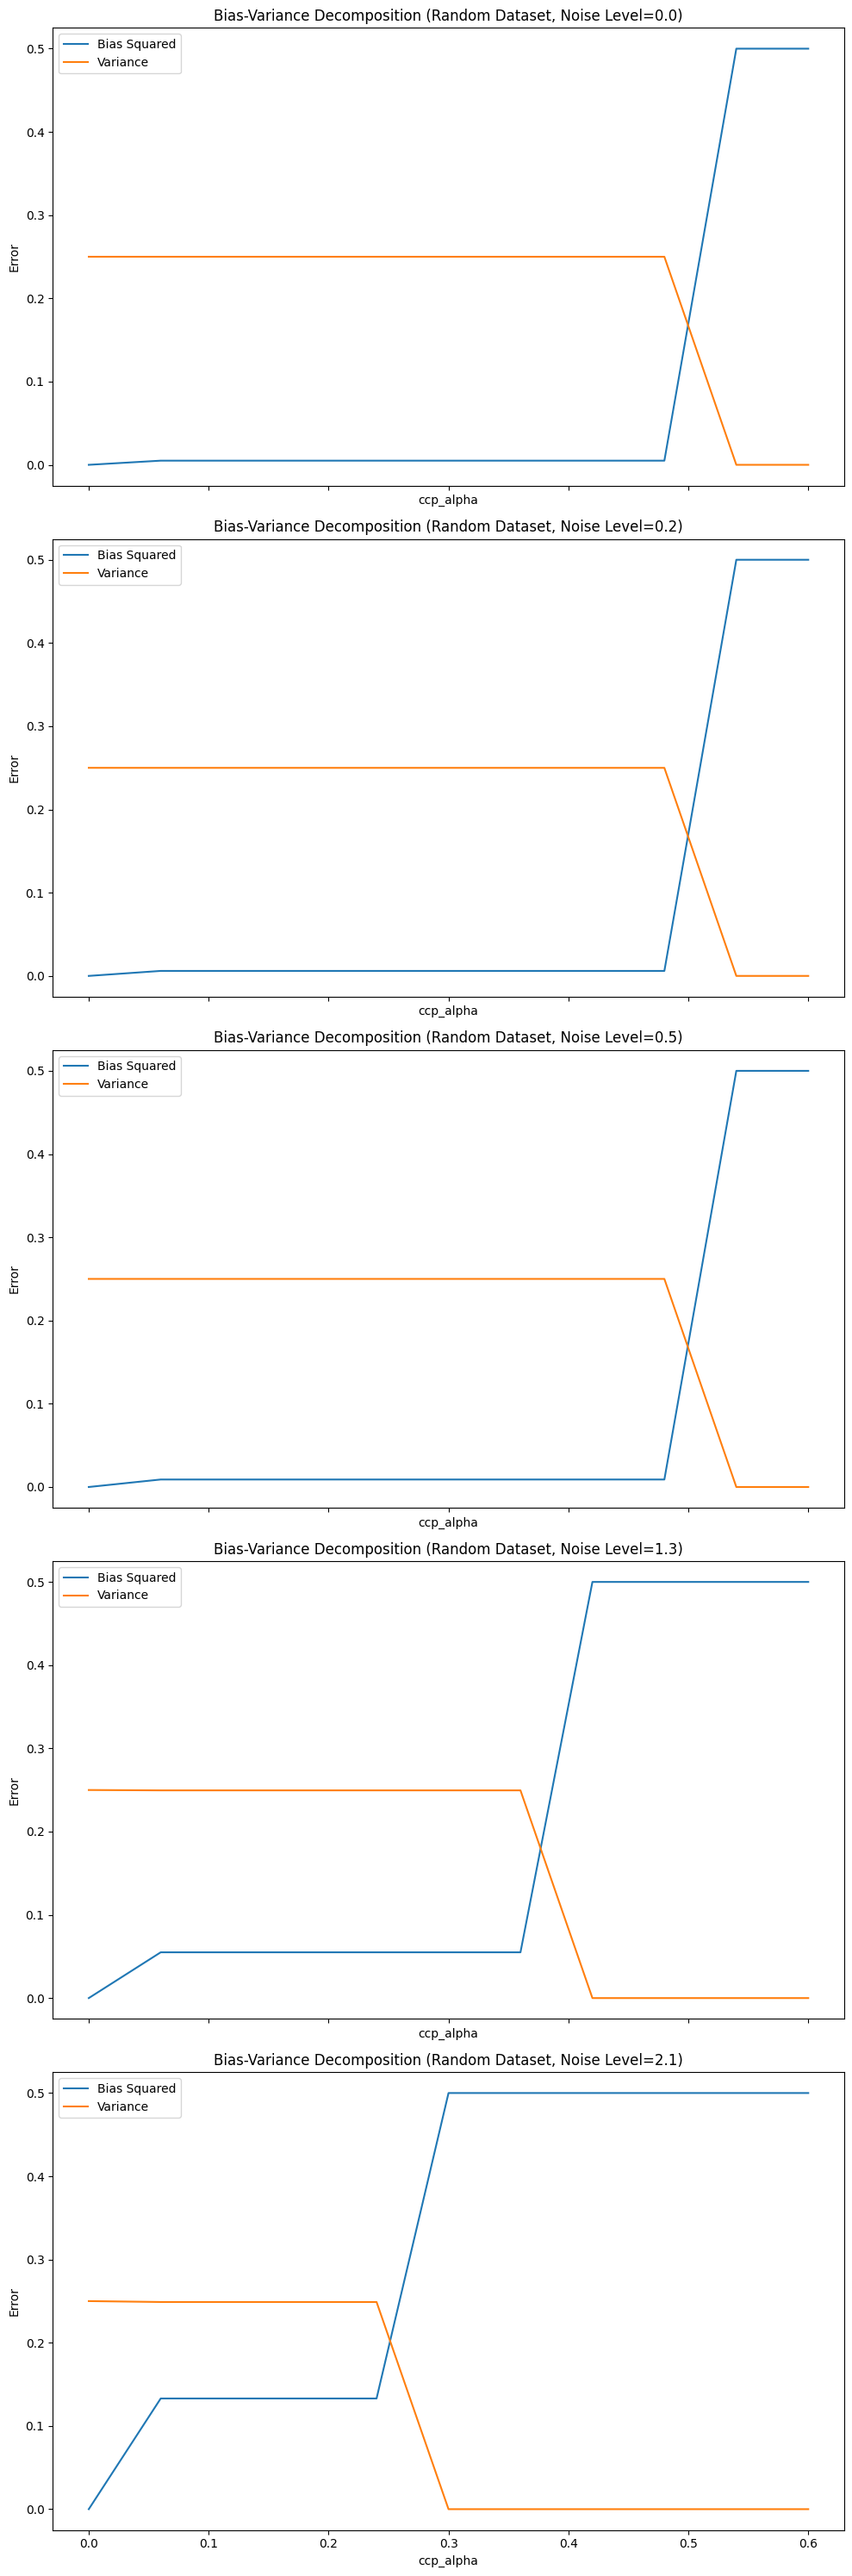

In [91]:
# Random dataset
# Define parameters
num_samples = 500
noise_levels = [0.0, 0.2, 0.5, 1.3, 2.1]
ccp_alphas = np.linspace(0, 0.6, 11)

# Initialize lists to store bias and variance for each noise level
bias_squared_all_random = []
variance_all_random = []

# Iterate over different noise levels
for noise_level in noise_levels:
    # Generate random dataset
    class1_samples, class2_samples = generate_random_normal_dataset(num_samples, noise_level)
    X_random = np.vstack((class1_samples, class2_samples))
    y_random = np.hstack((np.zeros(num_samples), np.ones(num_samples)))  # class labels
    
    # Initialize lists to store predictions
    predictions_all = []

    # Iterate over different ccp_alpha values
    for ccp_alpha in ccp_alphas:
        # Initialize lists to store predictions
        predictions = []

        # Fit decision tree classifier
        clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)
        clf.fit(X_random, y_random)

        # Make predictions on each sample
        for _ in range(100):
            y_pred = clf.predict(X_random)
            predictions.append(y_pred)
        predictions_all.append(predictions)
    
    # Reshape y_random to match the shape of avg_predictions
    y_random_reshaped = np.tile(y_random.reshape(1, -1), (11, 1))

    # Calculate bias squared and variance
    avg_predictions = np.mean(predictions_all, axis=1)
    bias_squared = np.mean((avg_predictions - y_random_reshaped) ** 2, axis=1)
    variance = np.mean(np.var(predictions_all, axis=2), axis=1)
    
    # Store bias and variance for current noise level
    bias_squared_all_random.append(bias_squared)
    variance_all_random.append(variance)

# Create subplots for each noise level
fig, axs = plt.subplots(len(noise_levels), 1, figsize=(10, 6 * len(noise_levels)), sharex=True)

# Iterate over different noise levels
for i, noise_level in enumerate(noise_levels):
    # Plot bias and variance for current noise level
    axs[i].plot(ccp_alphas, bias_squared_all_random[i], label='Bias Squared')
    axs[i].plot(ccp_alphas, variance_all_random[i], label='Variance')
    
    # Set title and labels
    axs[i].set_title(f'Bias-Variance Decomposition (Random Dataset, Noise Level={noise_level})')
    axs[i].set_xlabel('ccp_alpha')
    axs[i].set_ylabel('Error')
    axs[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()

## Plots


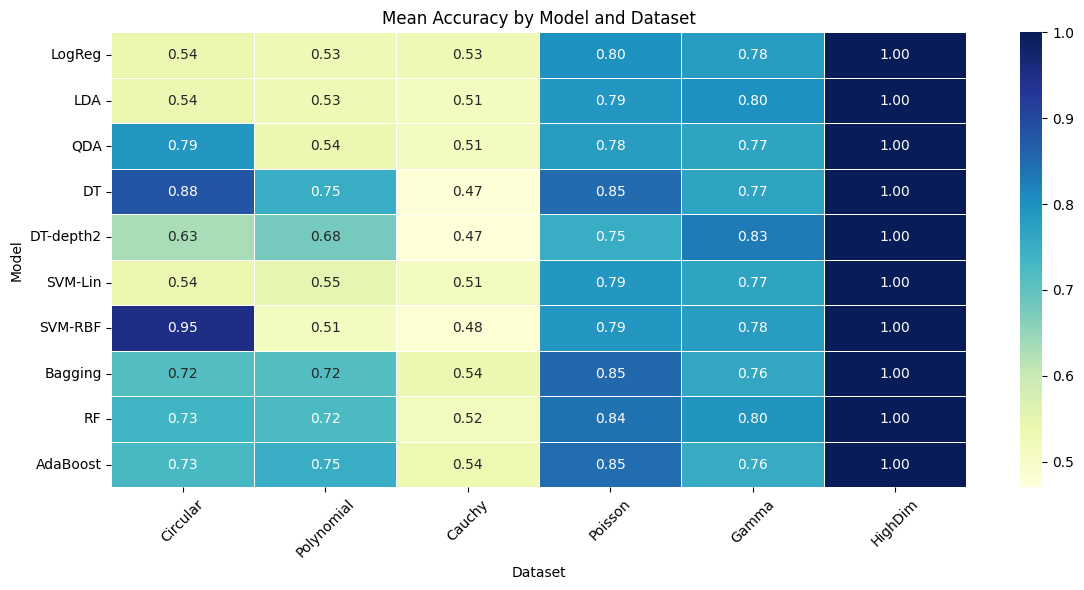

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

updated_data = {
    "Model": ["LogReg", "LDA", "QDA", "DT", "DT-depth2", "SVM-Lin", "SVM-RBF", "Bagging", "RF", "AdaBoost"],
    "Circular": [0.54, 0.54, 0.79, 0.88, 0.63, 0.54, 0.95, 0.716, 0.735, 0.727],
    "Polynomial": [0.53, 0.53, 0.54, 0.75, 0.68, 0.55, 0.51, 0.716, 0.724, 0.75],
    "Cauchy": [0.53, 0.51, 0.51, 0.475, 0.47, 0.51, 0.48, 0.54, 0.515, 0.535],
    "Poisson": [0.80, 0.79, 0.78, 0.85, 0.75, 0.79, 0.79, 0.855, 0.8425, 0.8475],
    "Gamma": [0.78, 0.80, 0.77, 0.77, 0.83, 0.77, 0.78, 0.76, 0.795, 0.755],
    "HighDim": [1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00],
}

df_updated = pd.DataFrame(updated_data)
df_updated.set_index("Model", inplace=True)




# Plot
plt.figure(figsize=(12, 6))
sns.heatmap(df_updated, annot=True, cmap="YlGnBu", linewidths=.5, fmt=".2f")
plt.title("Mean Accuracy by Model and Dataset")
plt.ylabel("Model")
plt.xlabel("Dataset")
plt.xticks(rotation=45)
plt.tight_layout()

